<center><h1>EE69205: Signal Processing System Design</h1></center>
<center><h2>Experiment-5: Analysis of Phonocardiogram Signal</h2></center>
<center><h3>Anirvan Krishna | 21EE38002</h3></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import sem
from scipy.io import loadmat
from scipy.signal import medfilt, firwin, lfilter, butter, filtfilt
from scipy.ndimage import gaussian_filter1d

# Data Reading 

In [2]:
data = loadmat('PCG_data\heartSoundData.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue May 22 17:30:21 2018',
 '__version__': '1.0',
 '__globals__': [],
 'heartSoundData': array([[(array([[-2.10571289e-03,  9.06372070e-03, -3.84521484e-03, ...,
                  9.40551758e-02, -1.64794922e-03,  3.96728516e-03],
                [-4.11987305e-03,  2.22167969e-02, -9.33837891e-03, ...,
                  9.14611816e-02,  1.83105469e-04, -1.92260742e-03],
                [-3.17382812e-03,  2.37731934e-02, -8.08715820e-03, ...,
                  8.58154297e-02, -3.75366211e-03, -3.63159180e-03],
                ...,
                [ 4.82177734e-03, -1.22070312e-04, -1.02905273e-01, ...,
                  2.82897949e-01,  3.38745117e-03, -3.61328125e-02],
                [ 7.14111328e-03, -1.09863281e-03, -9.42077637e-02, ...,
                  1.43829346e-01,  3.35693359e-03, -3.58886719e-02],
                [ 7.47680664e-03,  3.05175781e-05, -8.69750977e-02, ...,
                  4.35791016e-02,  3.2

In [4]:
heart_sound = data['heartSoundData'][0][0][0].T

In [5]:
heart_sound.shape

(3829, 10000)

In [6]:
heart_sound

array([[-2.10571289e-03, -4.11987305e-03, -3.17382812e-03, ...,
         4.82177734e-03,  7.14111328e-03,  7.47680664e-03],
       [ 9.06372070e-03,  2.22167969e-02,  2.37731934e-02, ...,
        -1.22070312e-04, -1.09863281e-03,  3.05175781e-05],
       [-3.84521484e-03, -9.33837891e-03, -8.08715820e-03, ...,
        -1.02905273e-01, -9.42077637e-02, -8.69750977e-02],
       ...,
       [ 9.40551758e-02,  9.14611816e-02,  8.58154297e-02, ...,
         2.82897949e-01,  1.43829346e-01,  4.35791016e-02],
       [-1.64794922e-03,  1.83105469e-04, -3.75366211e-03, ...,
         3.38745117e-03,  3.35693359e-03,  3.20434570e-03],
       [ 3.96728516e-03, -1.92260742e-03, -3.63159180e-03, ...,
        -3.61328125e-02, -3.58886719e-02, -3.97338867e-02]])

Text(0, 0.5, 'x[n]')

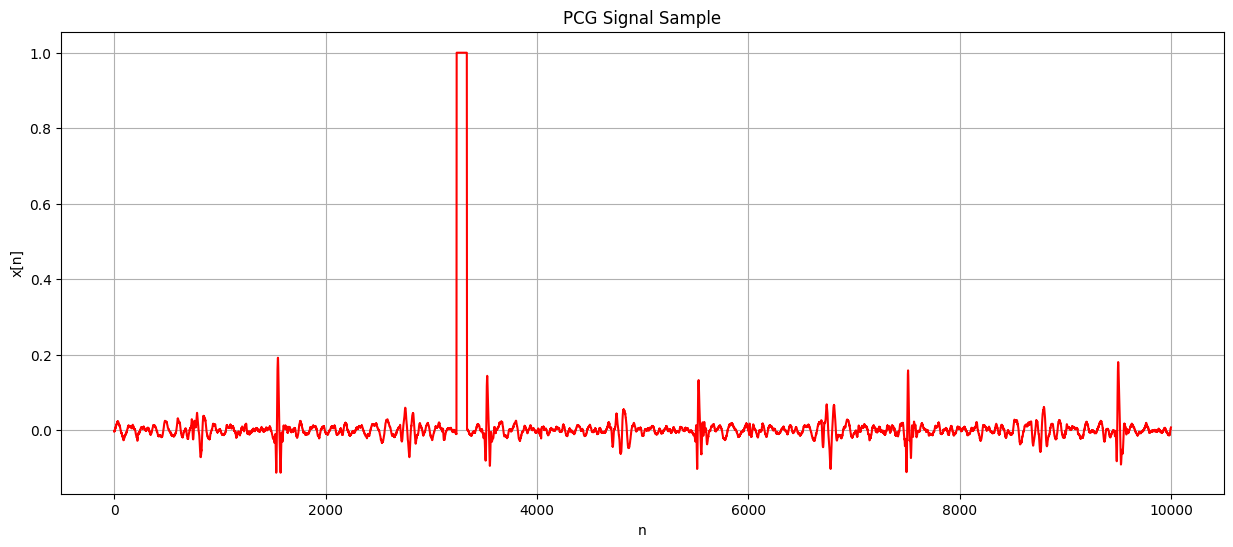

In [7]:
x = heart_sound[0]

plt.figure(figsize=(15, 6))
plt.plot(x, color='r')
plt.grid()
plt.title('PCG Signal Sample')
plt.xlabel('n')
plt.ylabel('x[n]')

## Supression of Spike Noise

To suppress spike noise, we apply a median filter with a specified length. The thresholding step sets values exceeding a defined threshold to zero. The median filter smooths the signal by replacing each point with the median of neighboring points, effectively reducing noise.

$$
y[n] = \text{median}(x[n-k:n+k])
$$

In [8]:
def median_filter(x, filter_len):
    y = np.zeros_like(x)
    for i in range(len(x)):
        if i < filter_len:
            y[i] = np.median(x[:i+1])
        else:
            y[i] = np.median(x[i-filter_len:i+1])
    return y

Text(0, 0.5, 'x[n]')

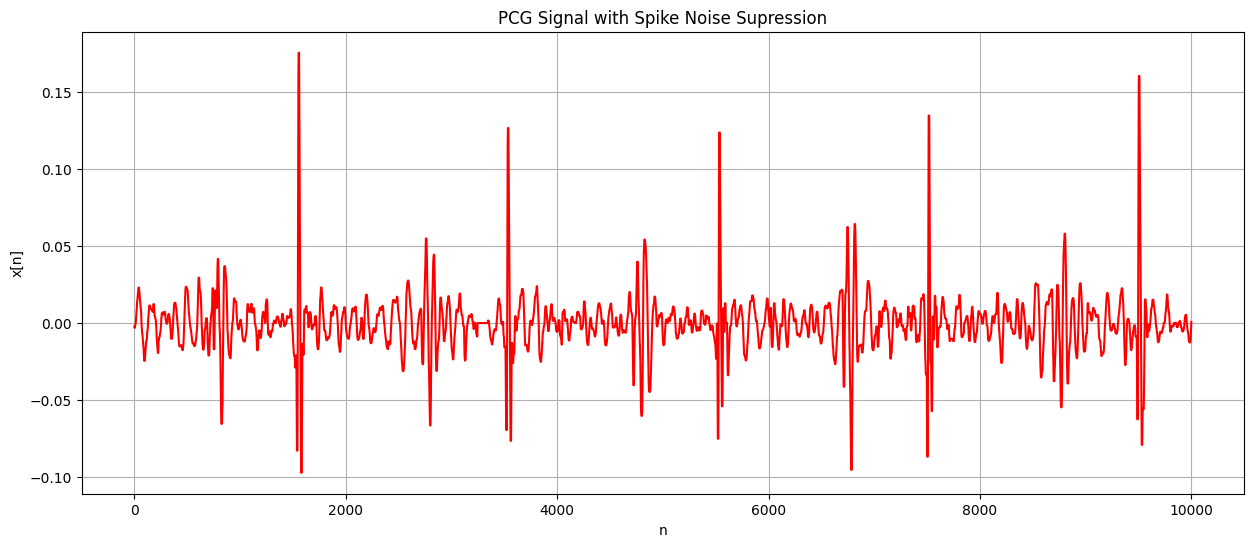

In [9]:
threshold = 0.2
x_thresholded = np.where(np.abs(x) > threshold, 0, x)

x_clean = median_filter(x_thresholded, filter_len=10)

plt.figure(figsize=(15, 6))
plt.plot(x_clean, color='r')
plt.grid()
plt.title('PCG Signal with Spike Noise Supression')
plt.xlabel('n')
plt.ylabel('x[n]')

## Gaussian White Noise Addition

Gaussian white noise is a random signal with a constant power spectral density. It is characterized by a normal distribution with zero mean and a specified variance. Mathematically, it is represented as:

$$
w[n] \sim \mathcal{N}(0, \sigma^2)
$$

where $\sigma^2$ is the variance.


In [10]:
# Generate white Gaussian noise
w = np.random.normal(0, 0.005, heart_sound[0].shape)

Text(0, 0.5, 'x[n]')

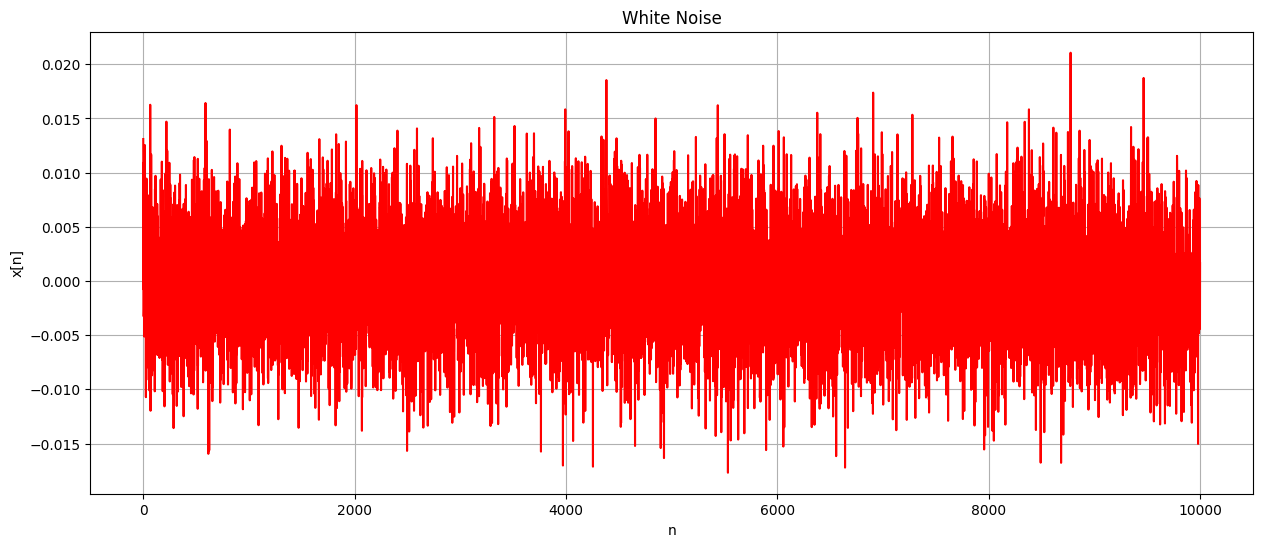

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(w, color='r')
plt.grid()
plt.title('White Noise')
plt.xlabel('n')
plt.ylabel('x[n]')

Text(0, 0.5, 'x[n]')

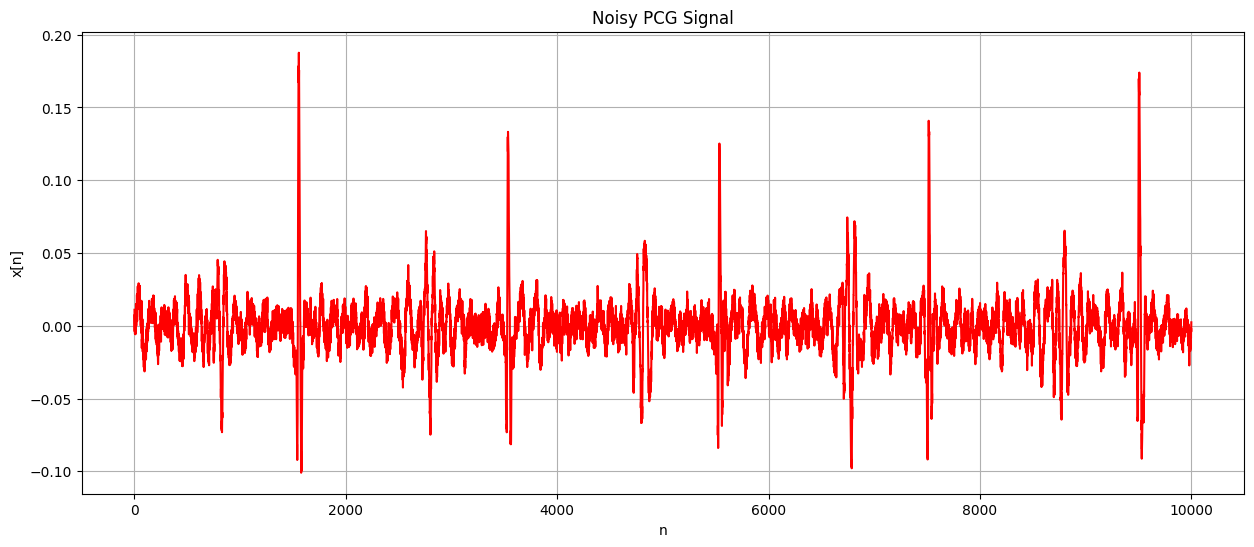

In [12]:
y = x_clean + w

plt.figure(figsize=(15, 6))
plt.plot(y, color='r')
plt.grid()
plt.title('Noisy PCG Signal')
plt.xlabel('n')
plt.ylabel('x[n]')

# Signal Filtering

## Time Domain Filtering

### Moving Average Filter

A moving average filter smooths a signal by averaging adjacent values. For a signal $ x[n] $, the filtered signal $ y[n] $ is:

$$
y[n] = \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]
$$

where $ M $ is the filter length, determining the smoothing extent.
```

In [13]:
def moving_average_filter(x, filter_len):
    return np.convolve(x, np.ones(filter_len) / filter_len, mode='same')

MSE for filter length 5: 4.896589640948658e-09
MSE for filter length 10: 4.84535795534058e-09
MSE for filter length 15: 4.819982427072801e-09
MSE for filter length 20: 4.743962584123613e-09
MSE for filter length 25: 4.688727262250374e-09


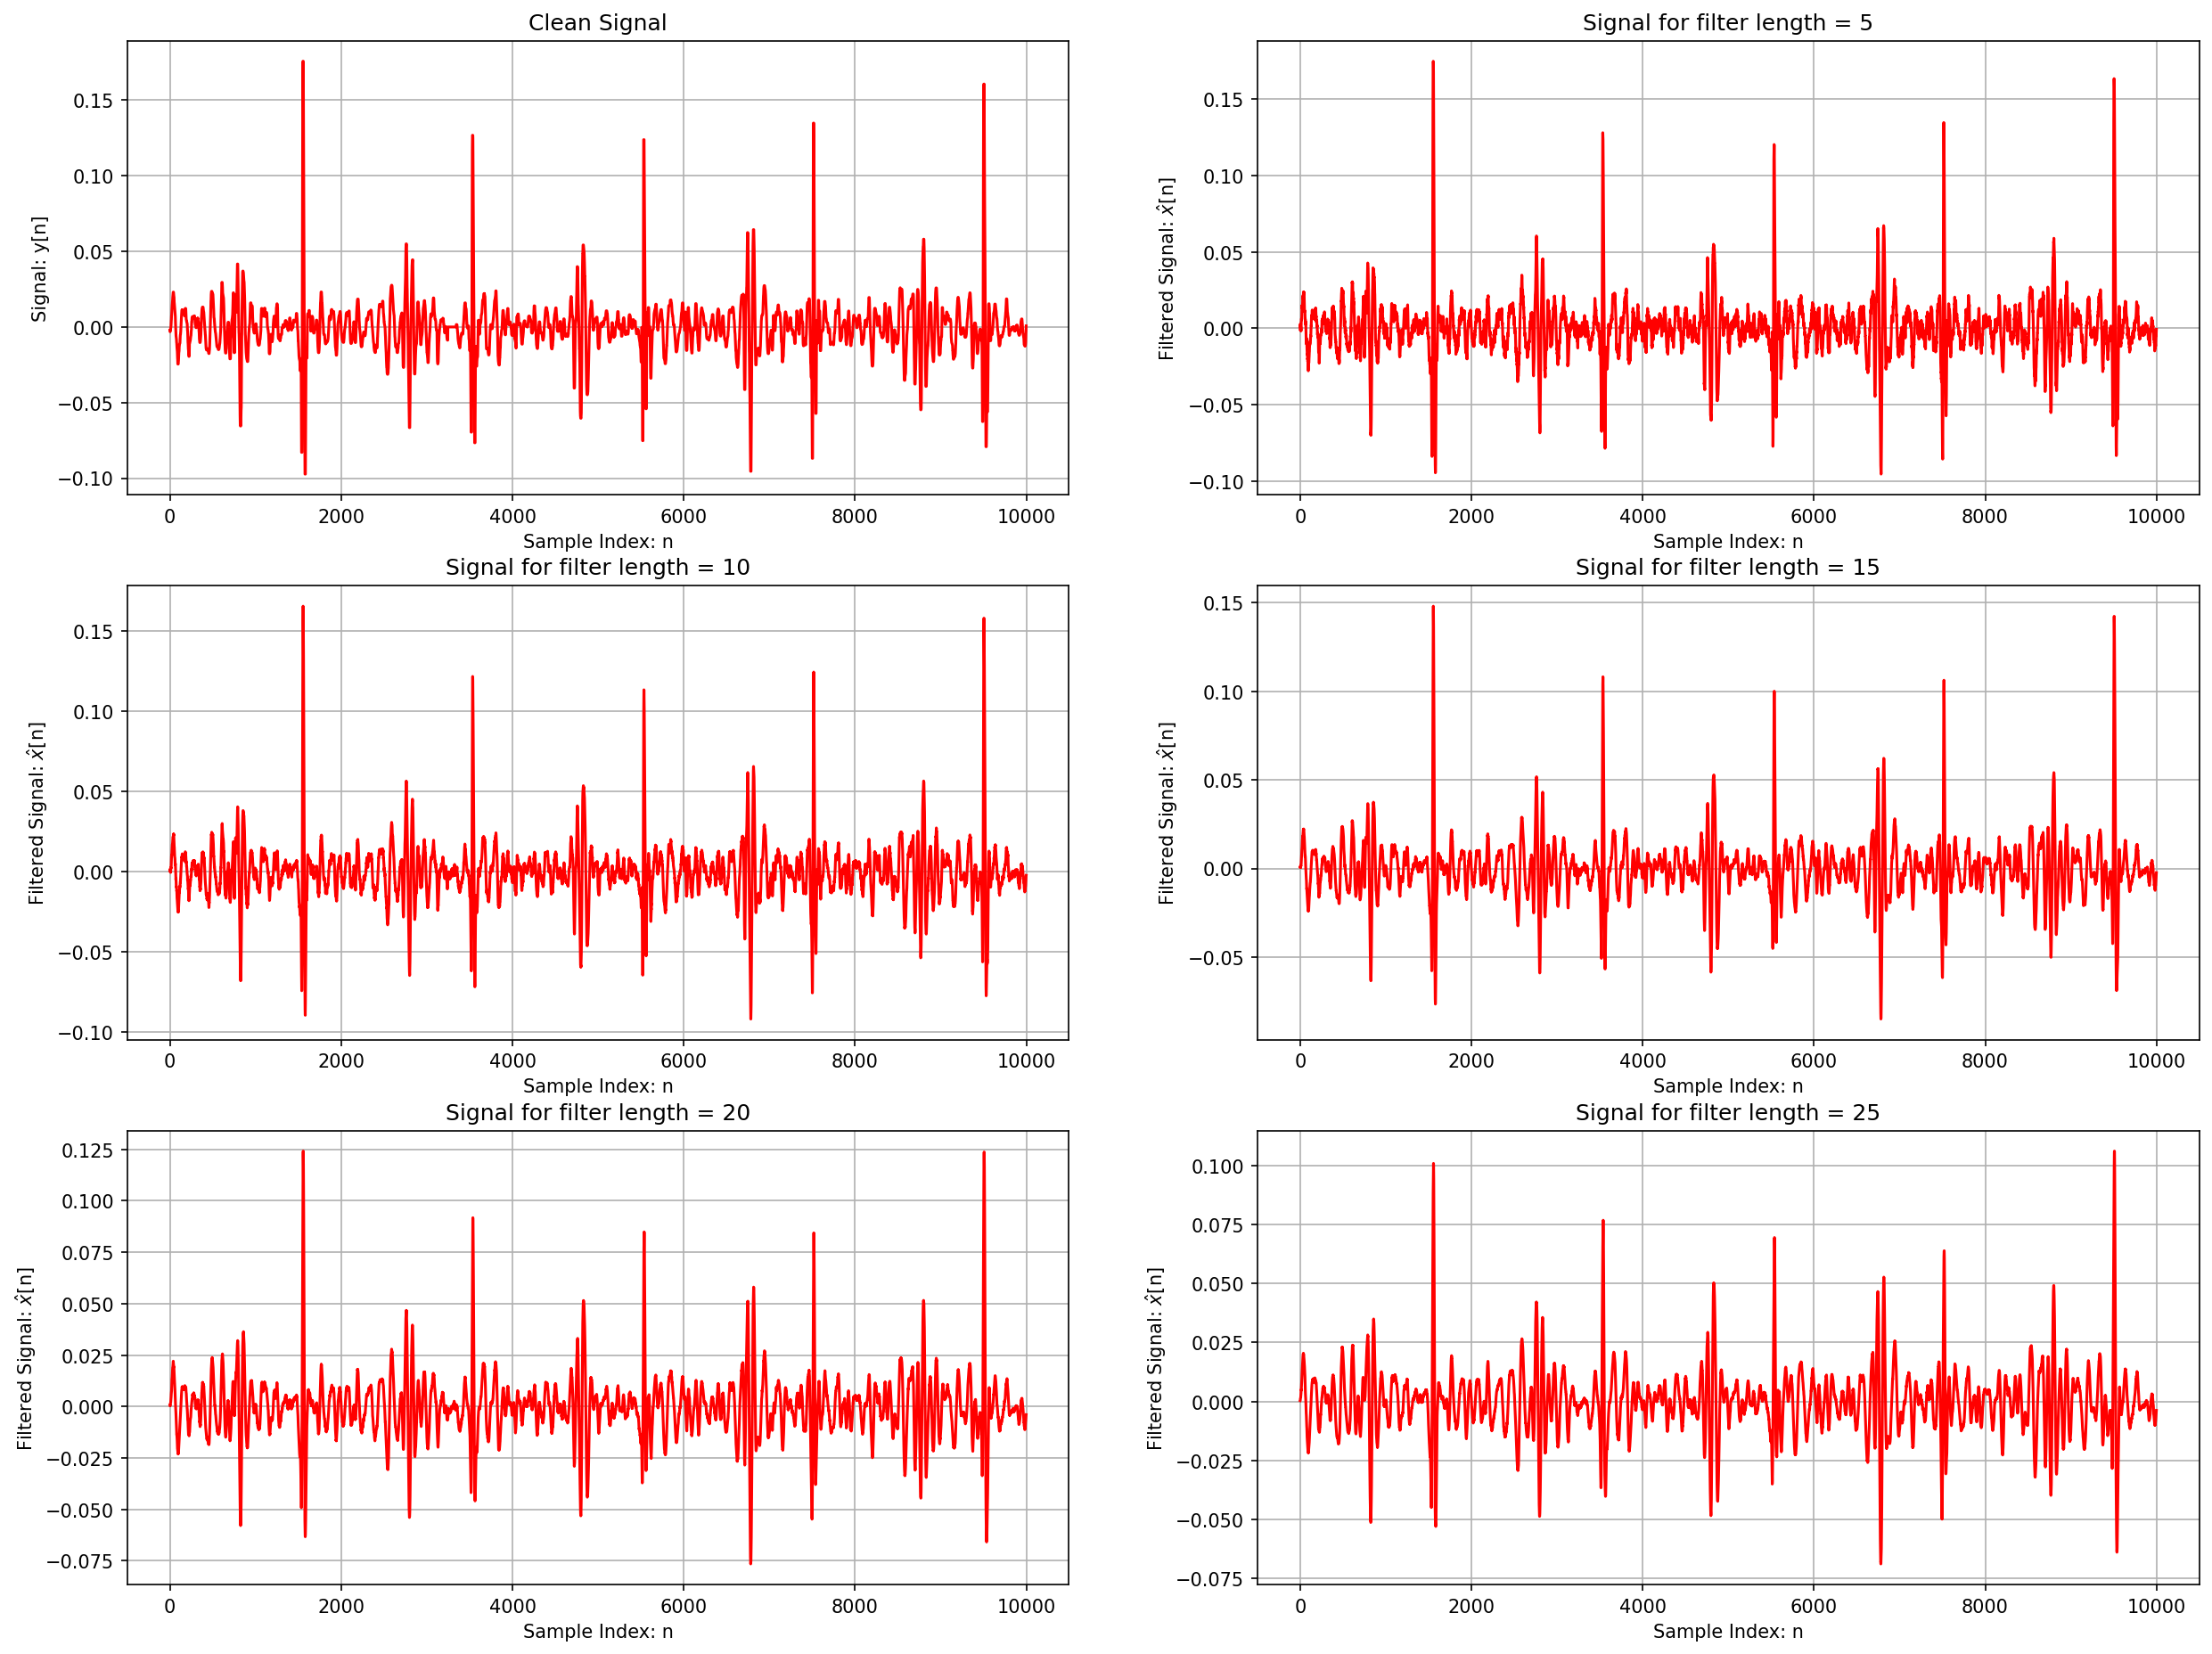

In [14]:
plt.figure(figsize=(20, 15), dpi=150)
k = [5, 10, 15, 20, 25]

plt.subplot(3, 2, 1)
plt.plot(x_clean, color='r')
plt.xlabel('Sample Index: n')
plt.ylabel('Signal: y[n]')
plt.title(f'Clean Signal')
plt.grid()

for i, filter_len in enumerate(k):
    plt.subplot(3, 2, i+2)
    y_hat = moving_average_filter(y, filter_len)
    print(f"MSE for filter length {filter_len}: {np.mean(y_hat-x_clean)**2}")
    plt.plot(y_hat, color='r')
    plt.xlabel('Sample Index: n')
    plt.ylabel('Filtered Signal: $\hat x$[n]')
    plt.title(f'Signal for filter length = {filter_len}')
    plt.grid()

### Gaussian Filter

A Gaussian filter smooths data by averaging surrounding values with weights from a Gaussian distribution. The filter's impulse response is:

$$
h[n] = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{n^2}{2\sigma^2}}
$$

where $ \sigma$ is the standard deviation, controlling the filter's width.
```

In [15]:
def gaussian_filter(x, filter_len, sigma):
    gaussian_kernel = signal.gaussian(filter_len, std=sigma, sym=True)
    gaussian_kernel /= np.sum(gaussian_kernel)  # Normalize the kernel
    return np.convolve(x, gaussian_kernel, mode='same')

MSE for std-dev 4: 4.896365981893033e-09
MSE for std-dev 6: 4.89649519616831e-09
MSE for std-dev 8: 4.8965374909449115e-09
MSE for std-dev 10: 4.896556553631368e-09
MSE for std-dev 12: 4.896566772505402e-09


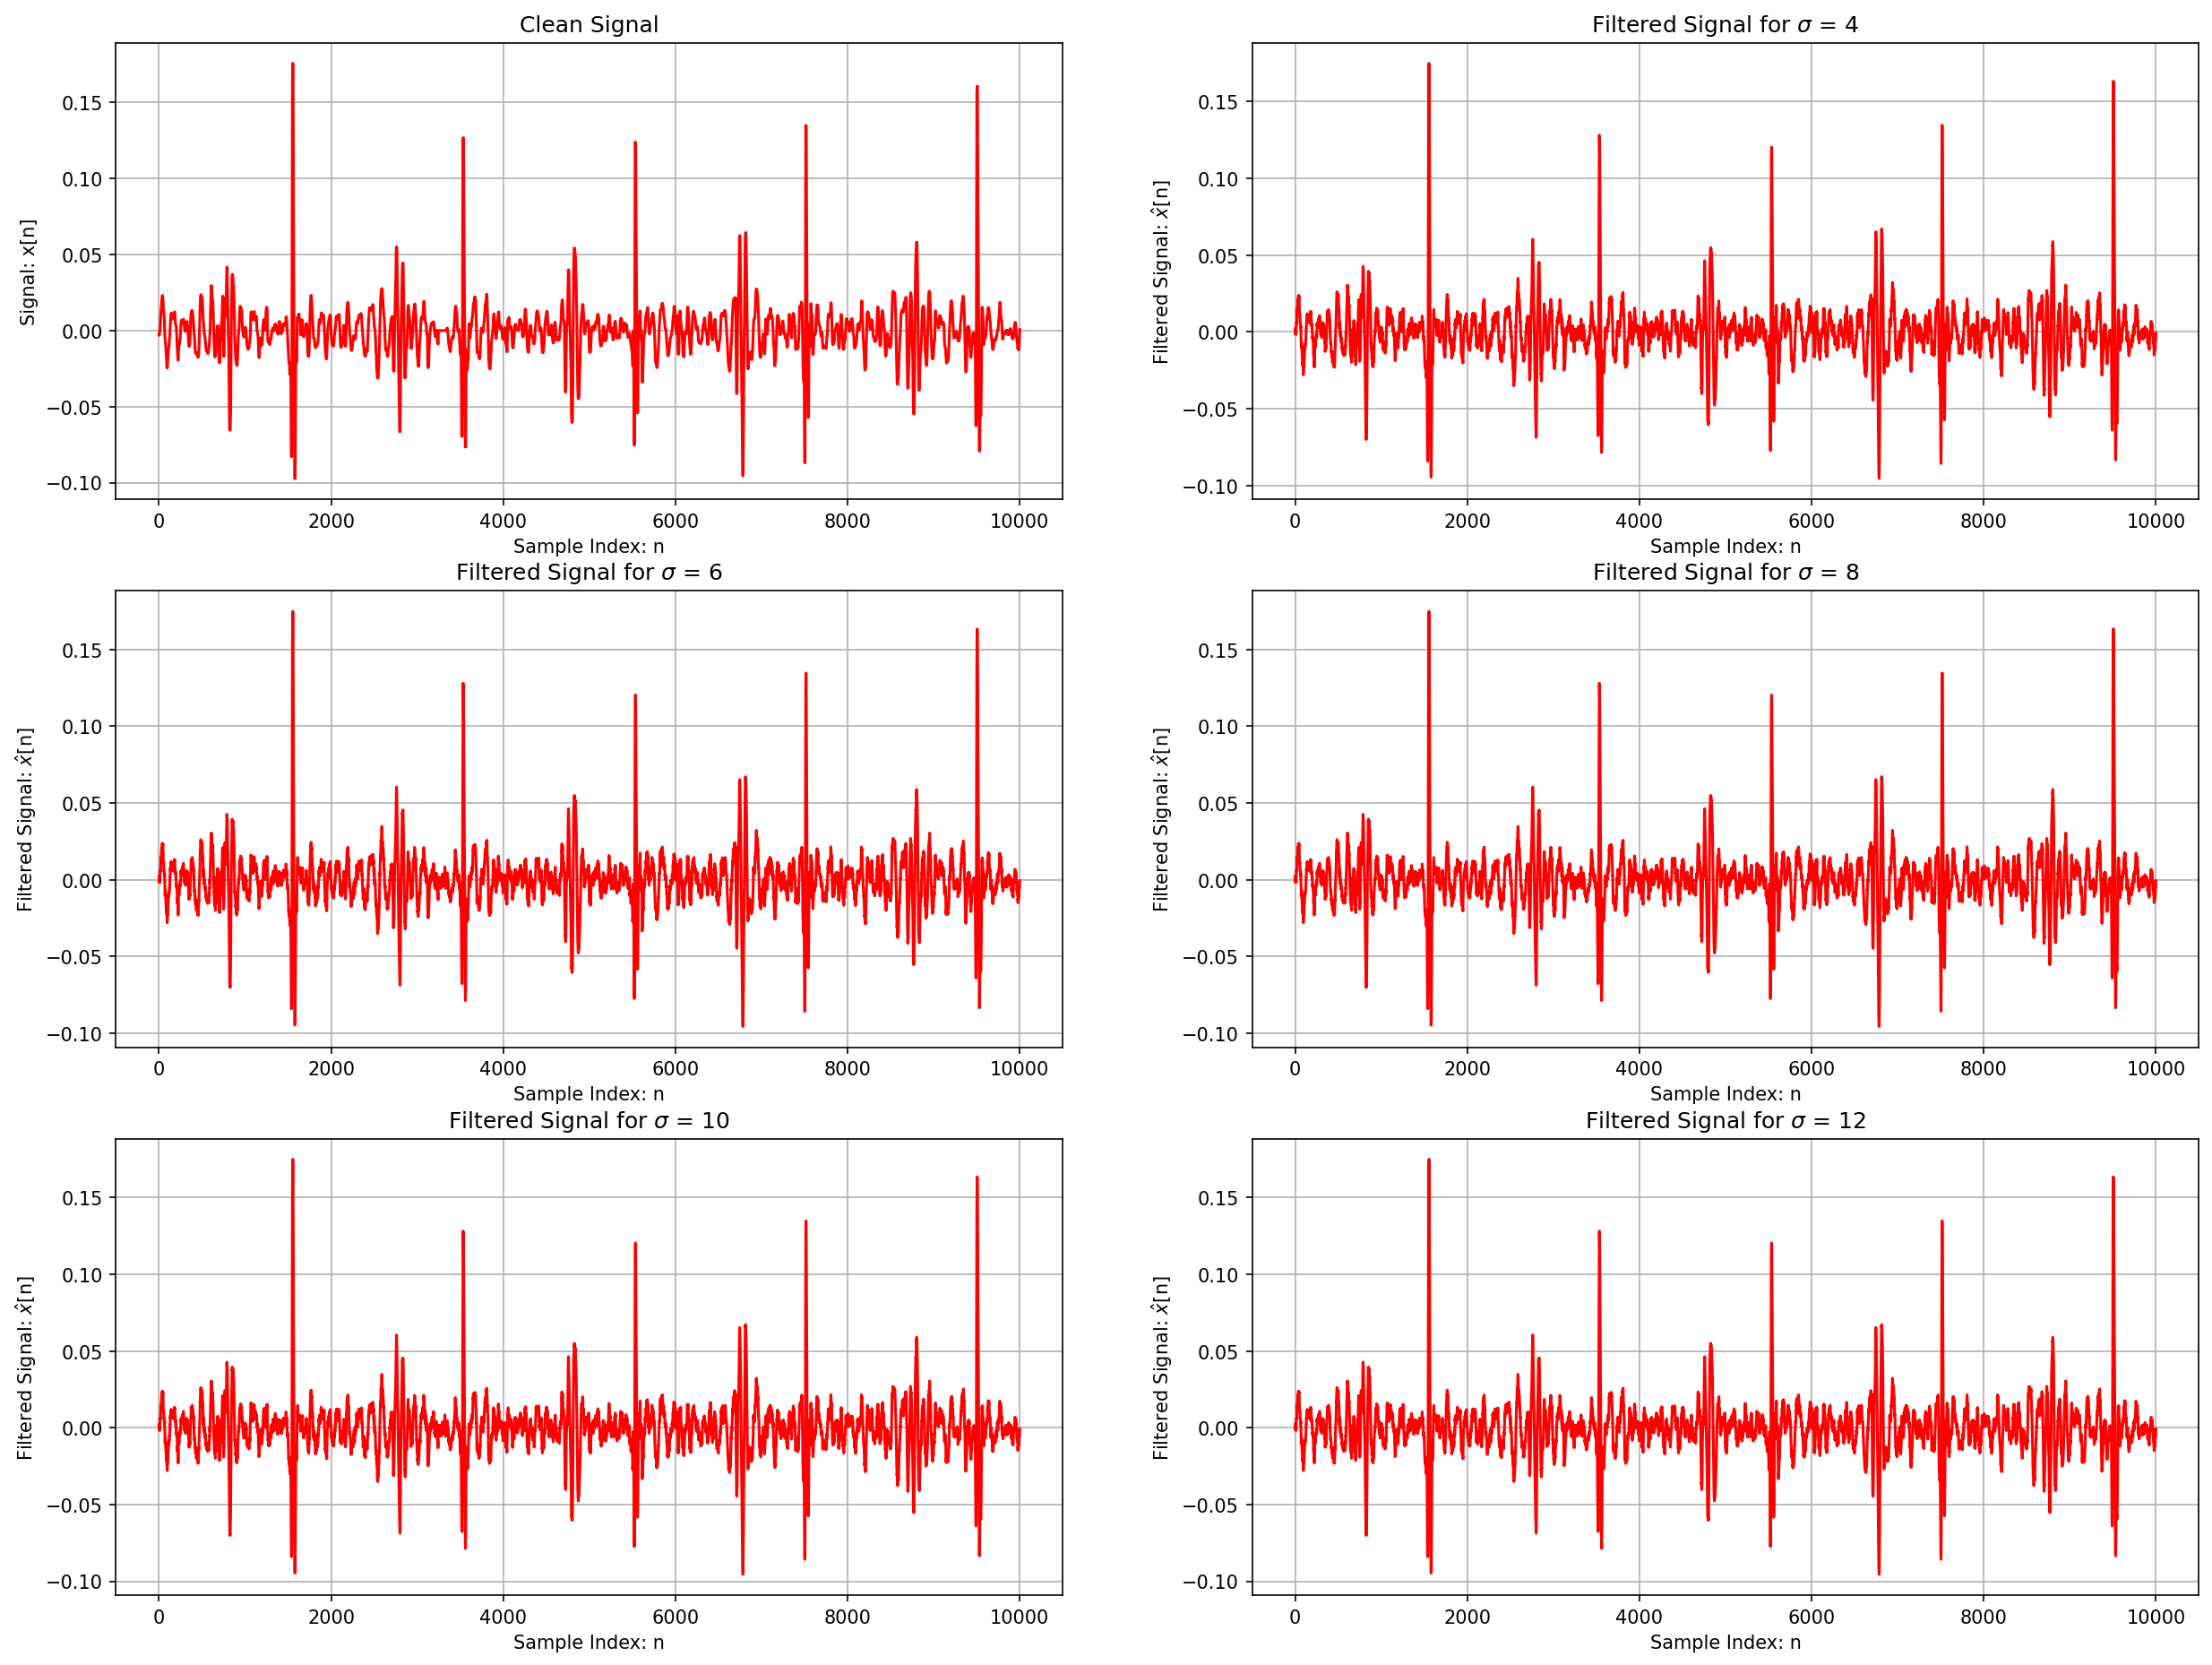

In [16]:
plt.figure(figsize=(20, 15), dpi=150)
sigma = [4, 6, 8, 10, 12]

plt.subplot(3, 2, 1)
plt.plot(x_clean, color='r')
plt.xlabel('Sample Index: n')
plt.ylabel('Signal: x[n]')
plt.title(f'Clean Signal')
plt.grid()

for i, sig in enumerate(sigma):
    plt.subplot(3, 2, i+2)
    y_hat = gaussian_filter(y, filter_len=5, sigma=sig)
    print(f"MSE for std-dev {sig}: {np.mean(y_hat-x_clean)**2}")
    plt.plot(y_hat, color='r')
    plt.xlabel('Sample Index: n')
    plt.ylabel('Filtered Signal: $\hat x$[n]')
    plt.title(f'Filtered Signal for $\sigma$ = {sig}')
    plt.grid()

MSE for filter length 11: 2.0922073525813624e-09
MSE for filter length 21: 4.171449604089711e-09
MSE for filter length 31: 3.3638148703193452e-09
MSE for filter length 41: 4.340180439935141e-09
MSE for filter length 51: 7.698730168640519e-08


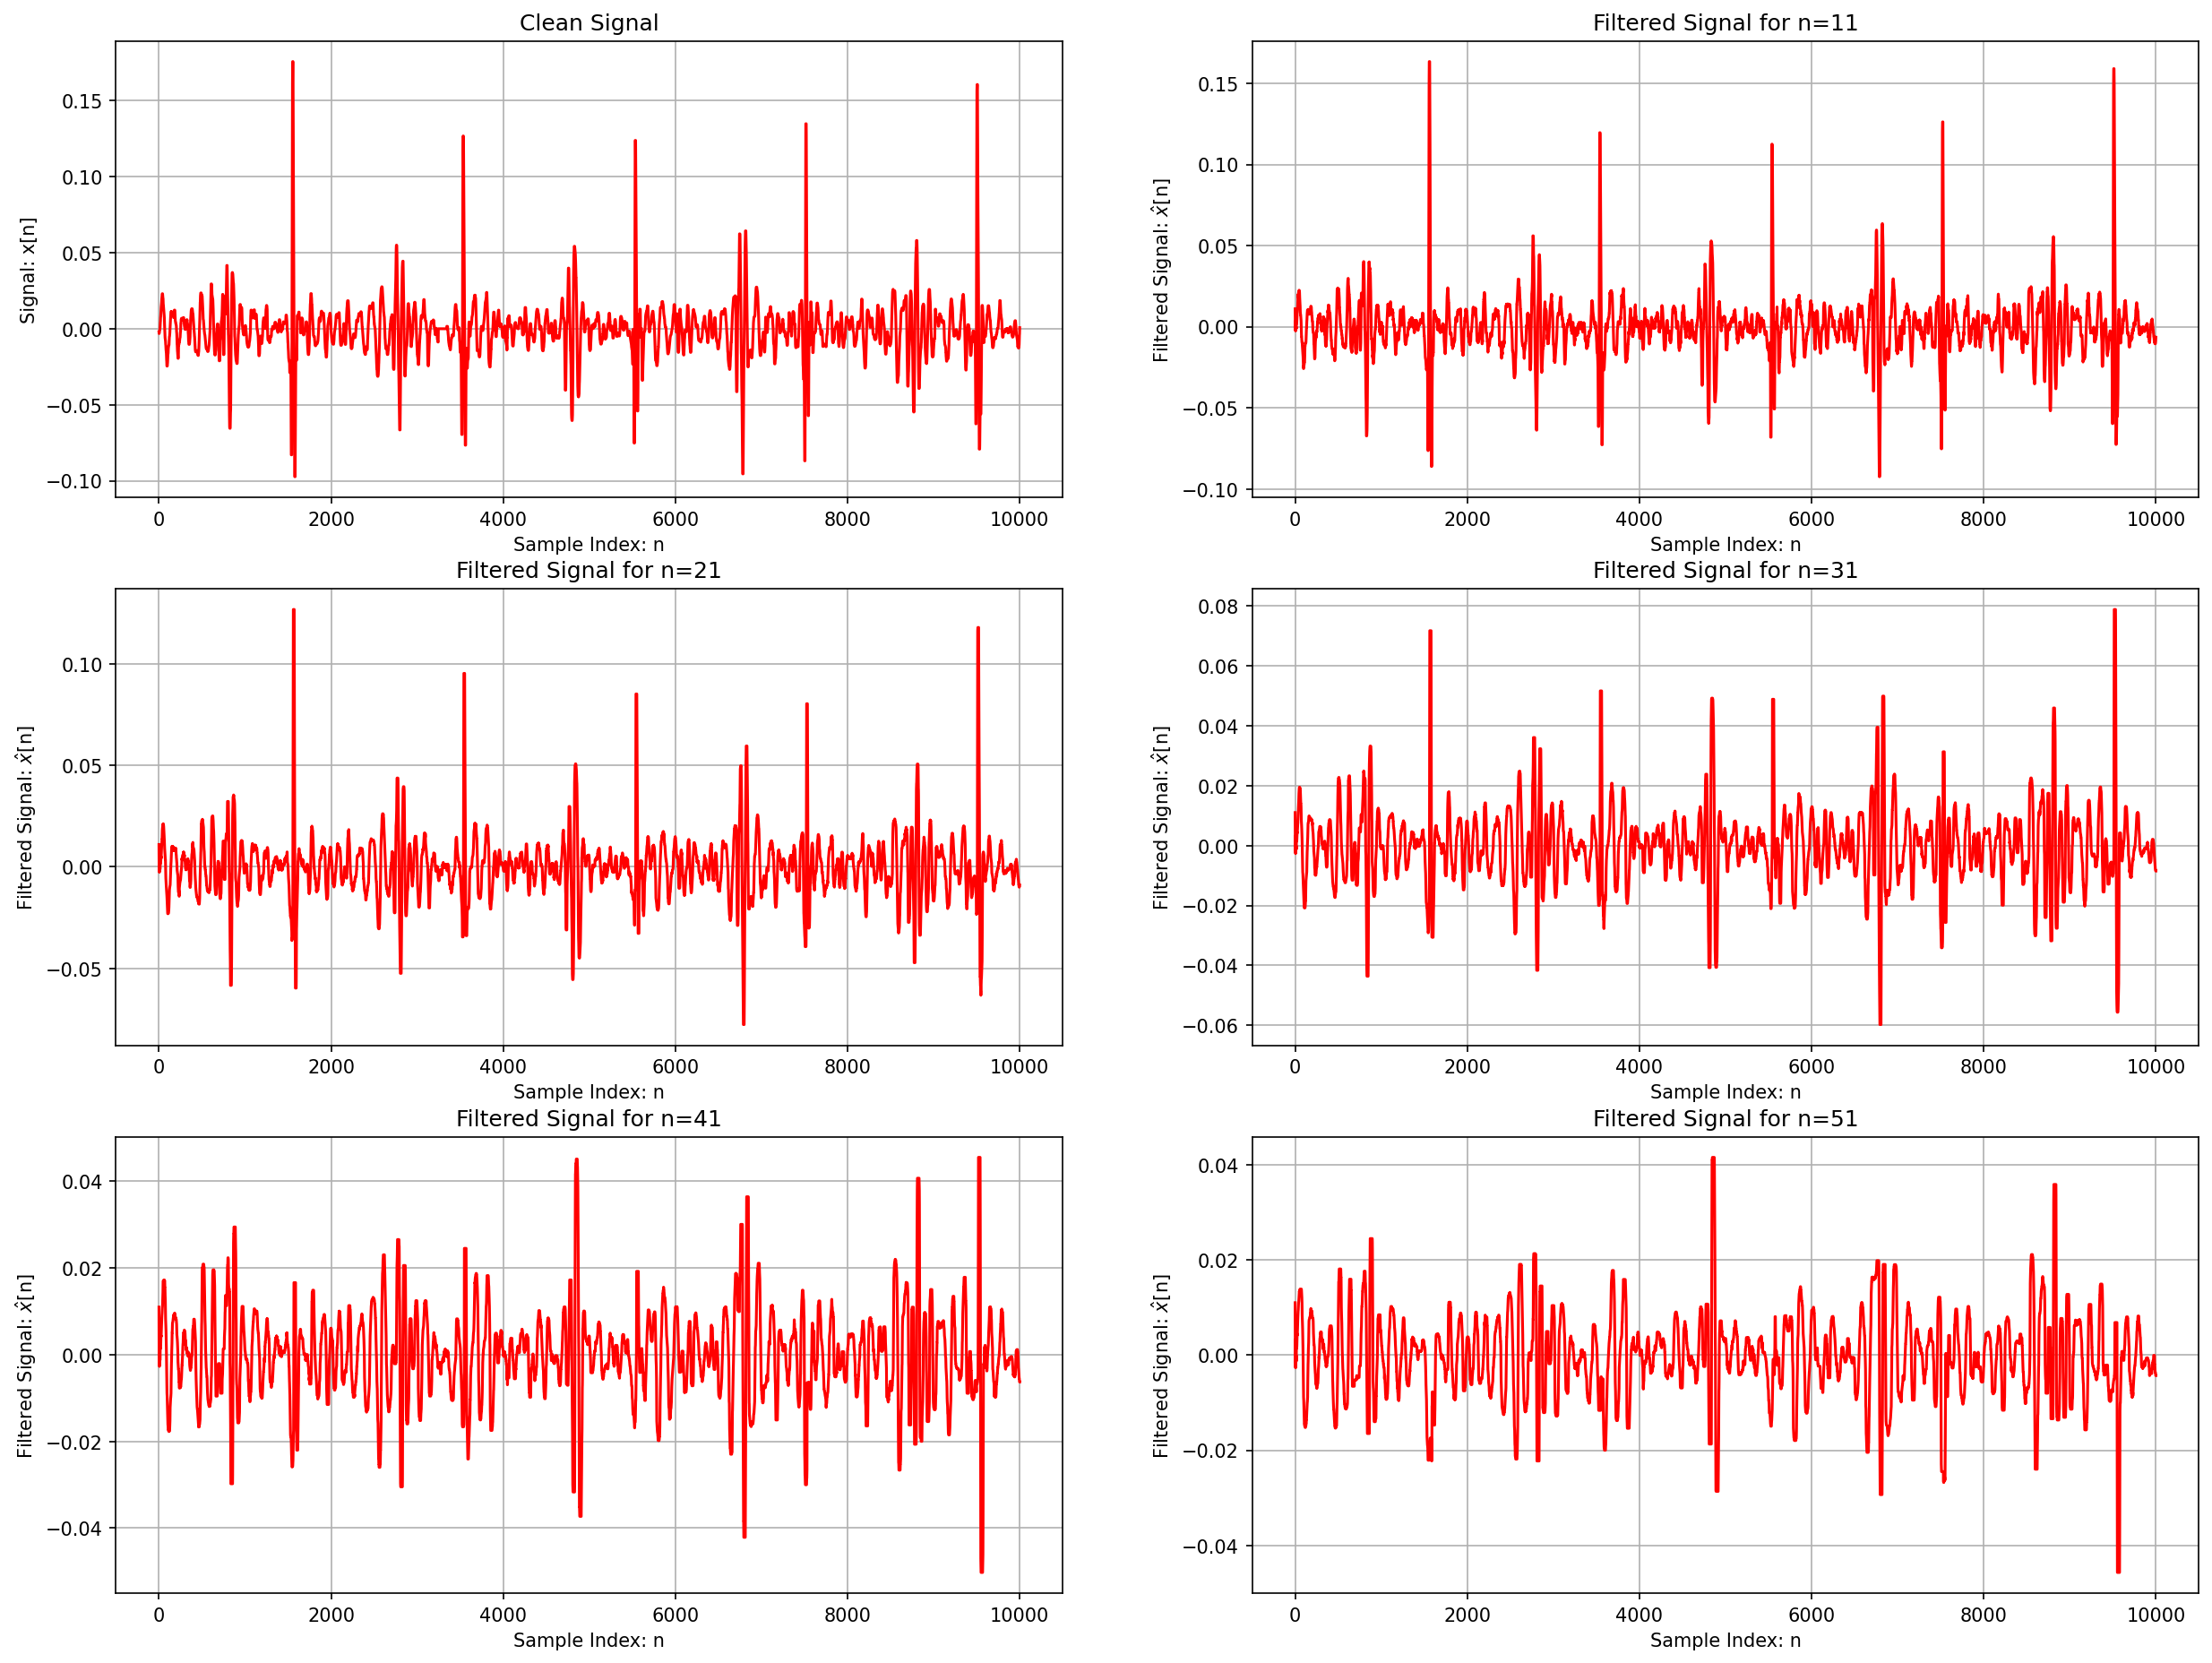

In [17]:
plt.figure(figsize=(20, 15), dpi=150)
n = [11, 21, 31, 41, 51]

plt.subplot(3, 2, 1)
plt.plot(x_clean, color='r')
plt.xlabel('Sample Index: n')
plt.ylabel('Signal: x[n]')
plt.title(f'Clean Signal')
plt.grid()

for i, filter_len in enumerate(n):
    plt.subplot(3, 2, i+2)
    y_hat = median_filter(y, filter_len)
    print(f"MSE for filter length {filter_len}: {np.mean(y_hat-x_clean)**2}")
    plt.plot(y_hat, color='r')
    plt.xlabel('Sample Index: n')
    plt.ylabel('Filtered Signal: $\hat x$[n]')
    plt.title(f'Filtered Signal for n={filter_len}')
    plt.grid()

## Frequency Domain Analysis and Filtering

### Fast Fourier Transform

The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Discrete Fourier Transform (DFT) of a sequence or signal. It is widely used in various signal processing applications, including frequency analysis, filtering, and spectral estimation.

The DFT of a sequence of N complex numbers x[n] is defined as:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N}
$$

where X[k] represents the k-th frequency component of the signal.

The FFT algorithm exploits the symmetry properties of the DFT to reduce the number of computations required. It divides the input sequence into smaller sub-sequences and recursively computes their DFTs. This divide-and-conquer approach significantly reduces the computational complexity from $O(N^2)$ to $O(N \log N)$.


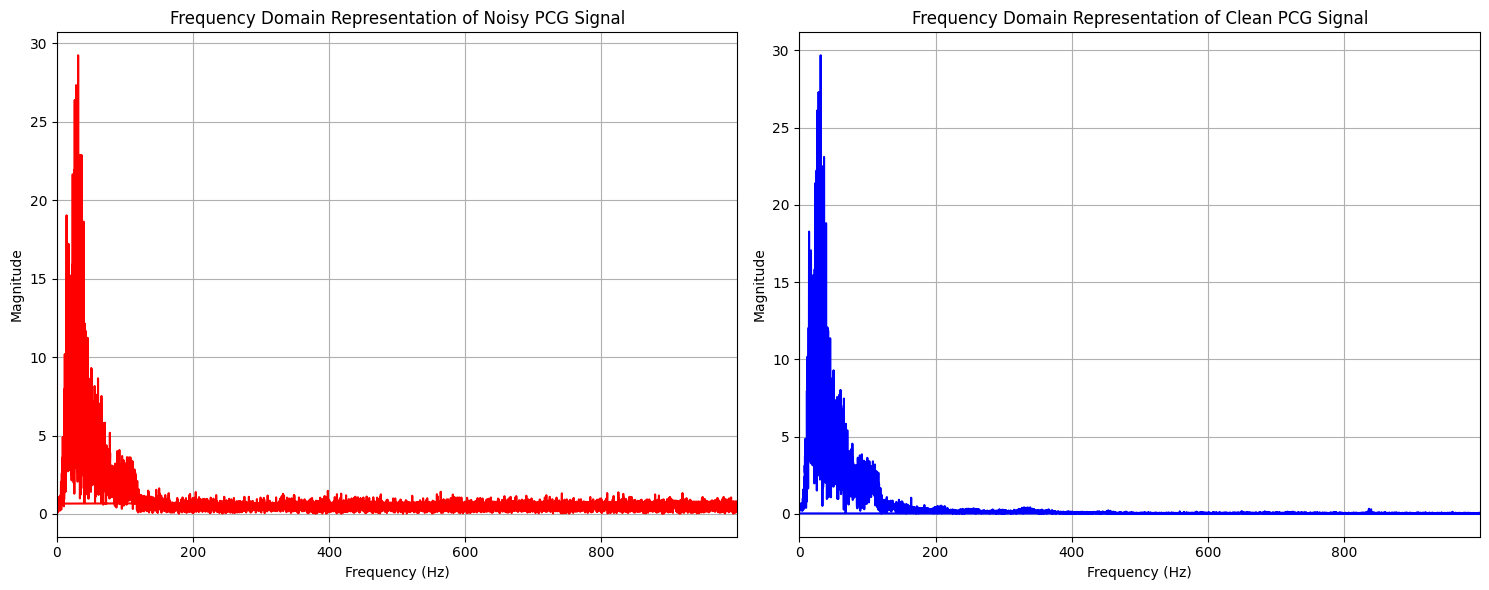

In [18]:
# Compute the FFT of the clean signal
x_clean_fft = np.fft.fft(x_clean)
# Compute the corresponding frequencies
freqs = np.fft.fftfreq(len(x_clean), d=5e-04)

# Compute the FFT of the noisy signal
y_fft = np.fft.fft(y)
# Compute the corresponding frequencies
freqs = np.fft.fftfreq(len(y), d=5e-04)

# Plot the magnitude of the FFT for both noisy and clean signals
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(freqs, np.abs(y_fft), color='r')
plt.grid()
plt.title('Frequency Domain Representation of Noisy PCG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, np.max(freqs))

plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(x_clean_fft), color='b')
plt.grid()
plt.title('Frequency Domain Representation of Clean PCG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, np.max(freqs))

plt.tight_layout()
plt.show()

### Bandpass FIR Filtering

A bandpass filter is a type of filter that allows a specific range of frequencies, known as the passband, to pass through while attenuating frequencies outside the passband. FIR bandpass filters are designed to selectively filter out unwanted frequencies and retain the desired frequency range.

The general equation for an FIR filter can be represented as:

$$
y[n] = \sum_{k=0}^{N-1} h[k] \cdot x[n-k]
$$

where:
- $y[n]$ is the output sample at time index $n$
- $x[n-k]$ is the input sample at time index $n-k$
- $h[k]$ is the filter coefficient at index $k$
- $N$ is the filter order

To design a bandpass filter, we need to determine the filter coefficients $h[k]$ that define the desired frequency response. The frequency response of an FIR filter can be obtained by taking the Discrete Fourier Transform (DFT) of the filter coefficients.

Once the cutoff frequencies are determined, the filter coefficients can be calculated using various filter design techniques, such as the window method or the Parks-McClellan algorithm.

In [19]:
def bandpass_fir_filter(x, low, high, sampling_rate, window, order):

    x = x.flatten()
    # Normalize the cutoff frequencies
    low_norm = low / (sampling_rate / 2)
    high_norm = high / (sampling_rate / 2)

    # Design the FIR filter
    taps = signal.firwin(order, [low_norm, high_norm],
                         pass_zero=False, fs=sampling_rate, window=window)

    # Apply the FIR filter to the signal
    filtered_signal = signal.lfilter(taps, [1.0], x)

    return filtered_signal

MSE for window: hamming: 2.425202632569315e-09
MSE for window: hann: 2.3924303030898375e-09
MSE for window: blackman: 2.3570403855917914e-09
MSE for window: bartlett: 2.429379334076518e-09


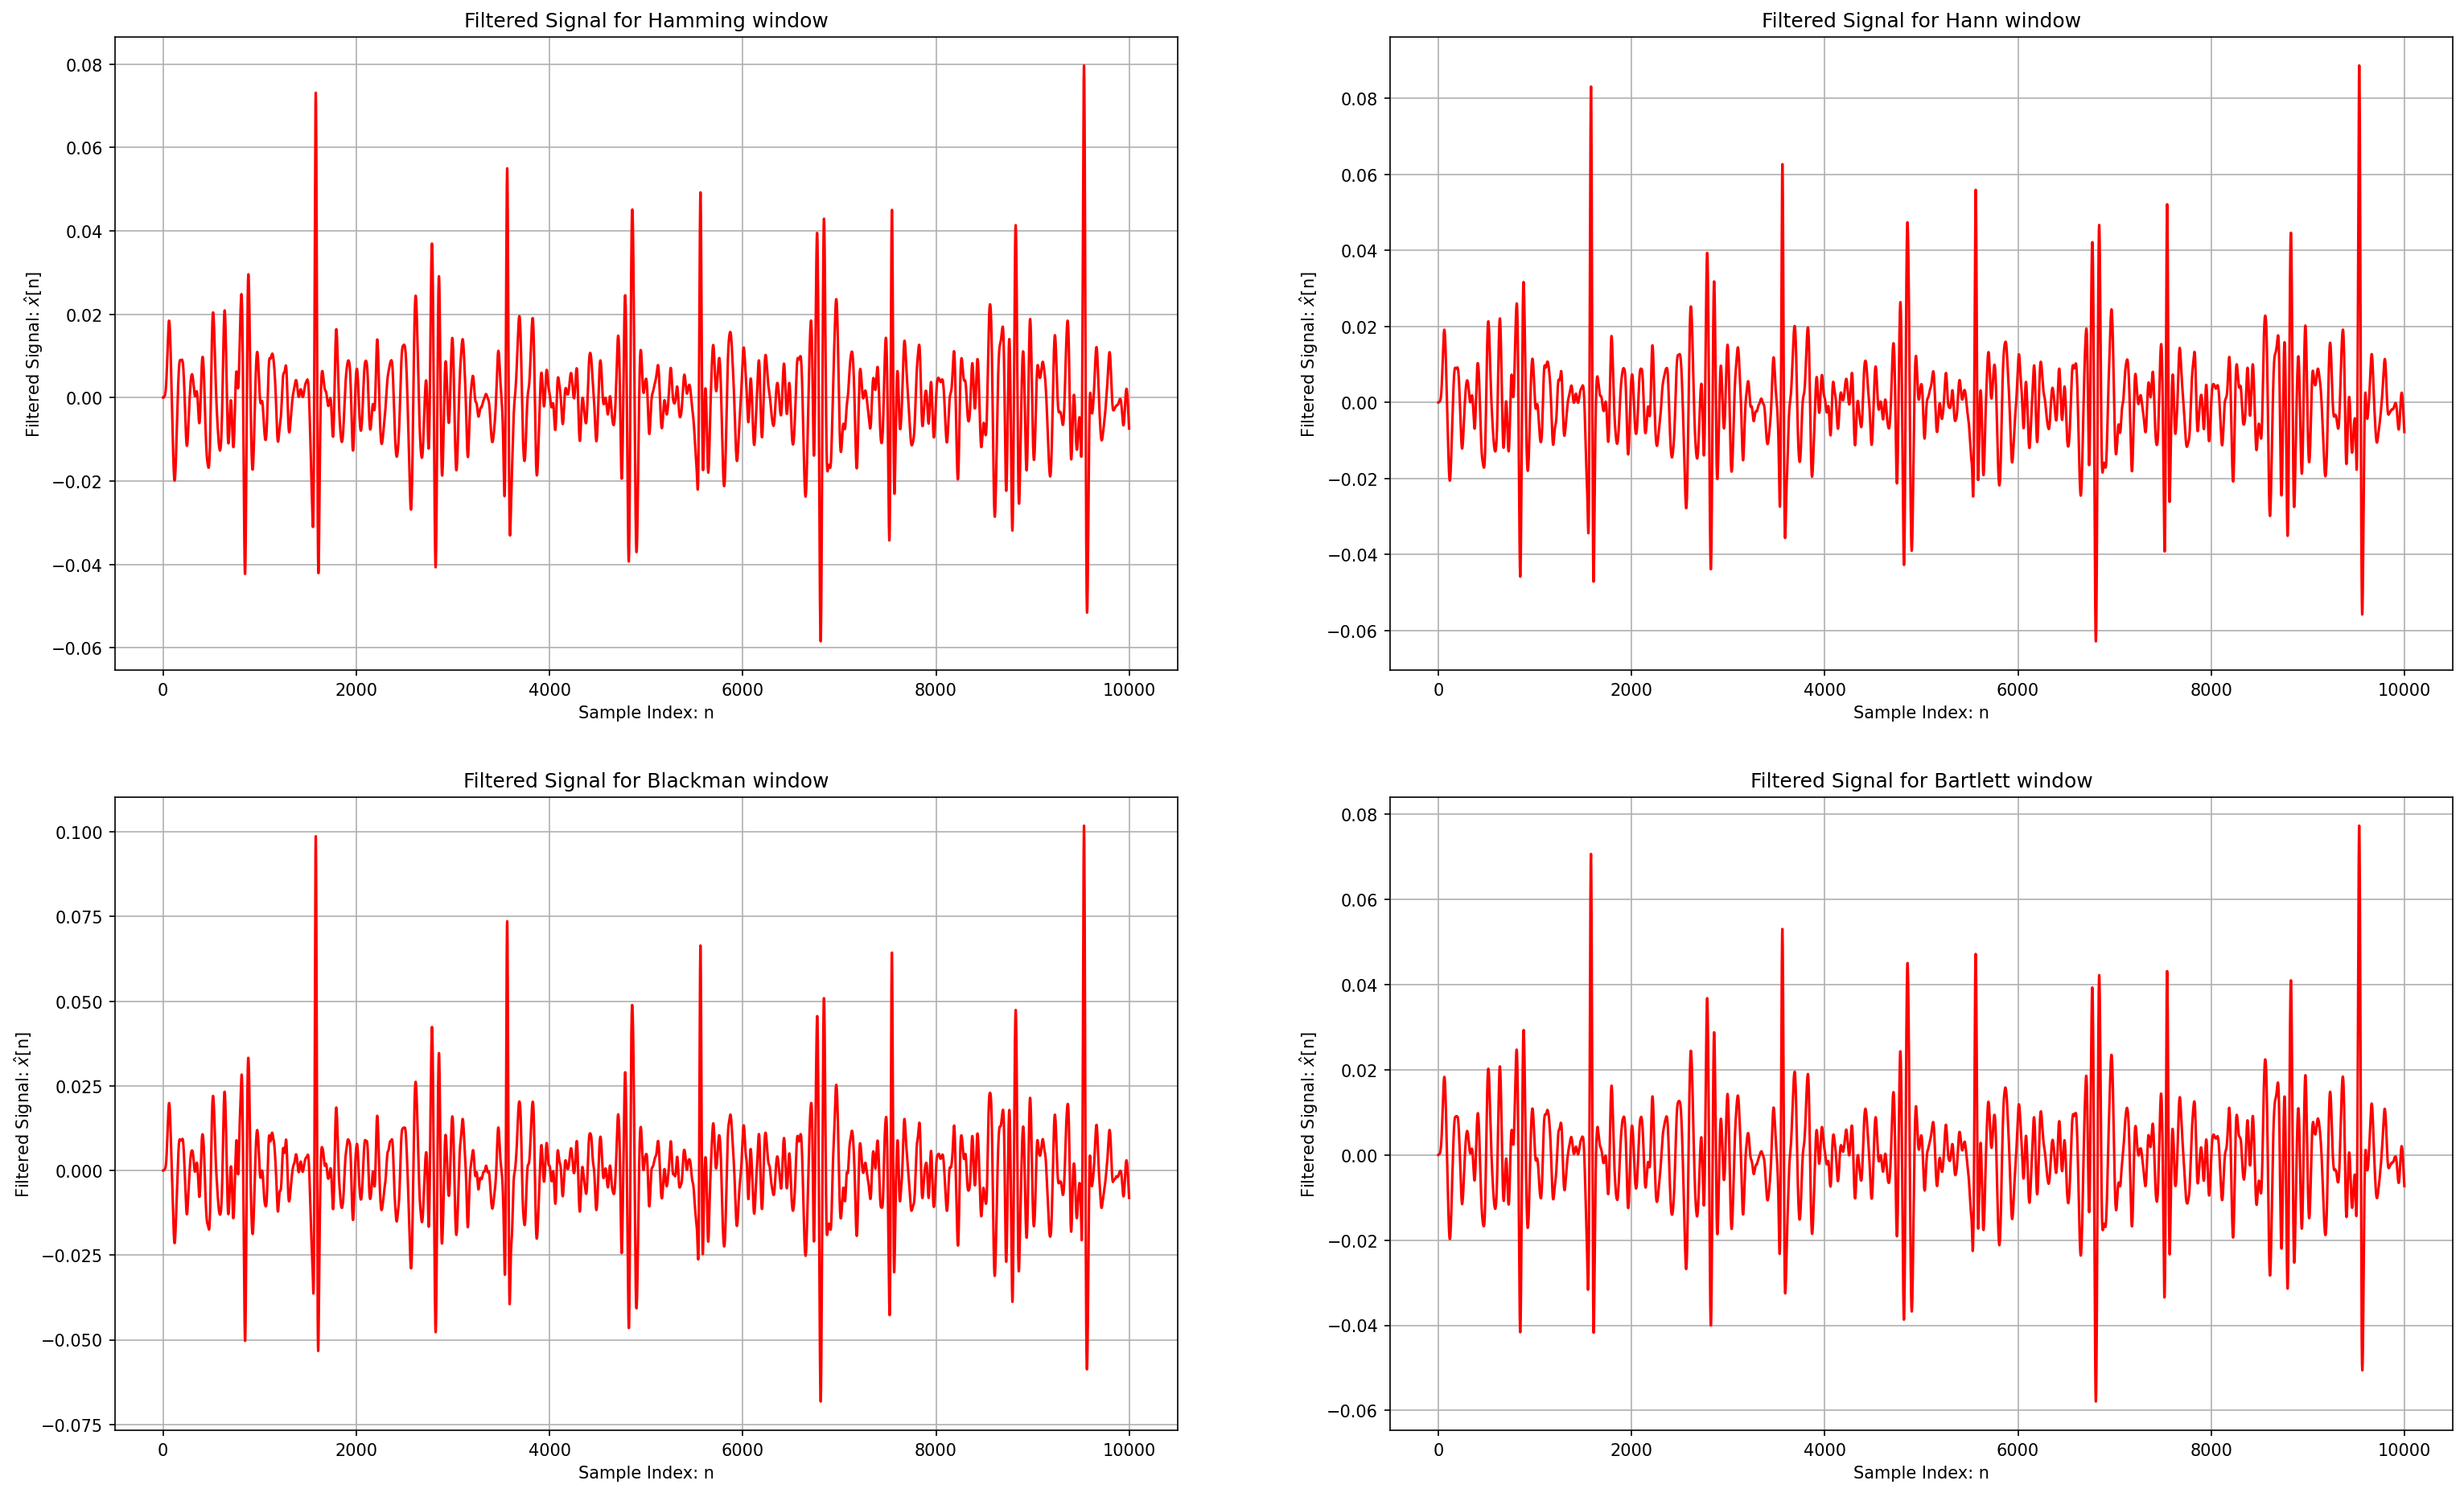

In [20]:
window_options = ['hamming', 'hann', 'blackman', 'bartlett']

order = 50
lowcut = 20
highcut = 200
sr = 2000

plt.figure(figsize=(25, 15), dpi=150)

for i, win in enumerate(window_options):
    plt.subplot(2, 2, i+1)
    y_hat = bandpass_fir_filter(y, lowcut, highcut, sr, win, order)
    print(f"MSE for window: {win}: {np.mean(y_hat-x_clean)**2}")
    plt.plot(y_hat, color='r')
    plt.xlabel('Sample Index: n')
    plt.ylabel('Filtered Signal: $\hat x$[n]')
    plt.title(f'Filtered Signal for {win.capitalize()} window')
    plt.grid()

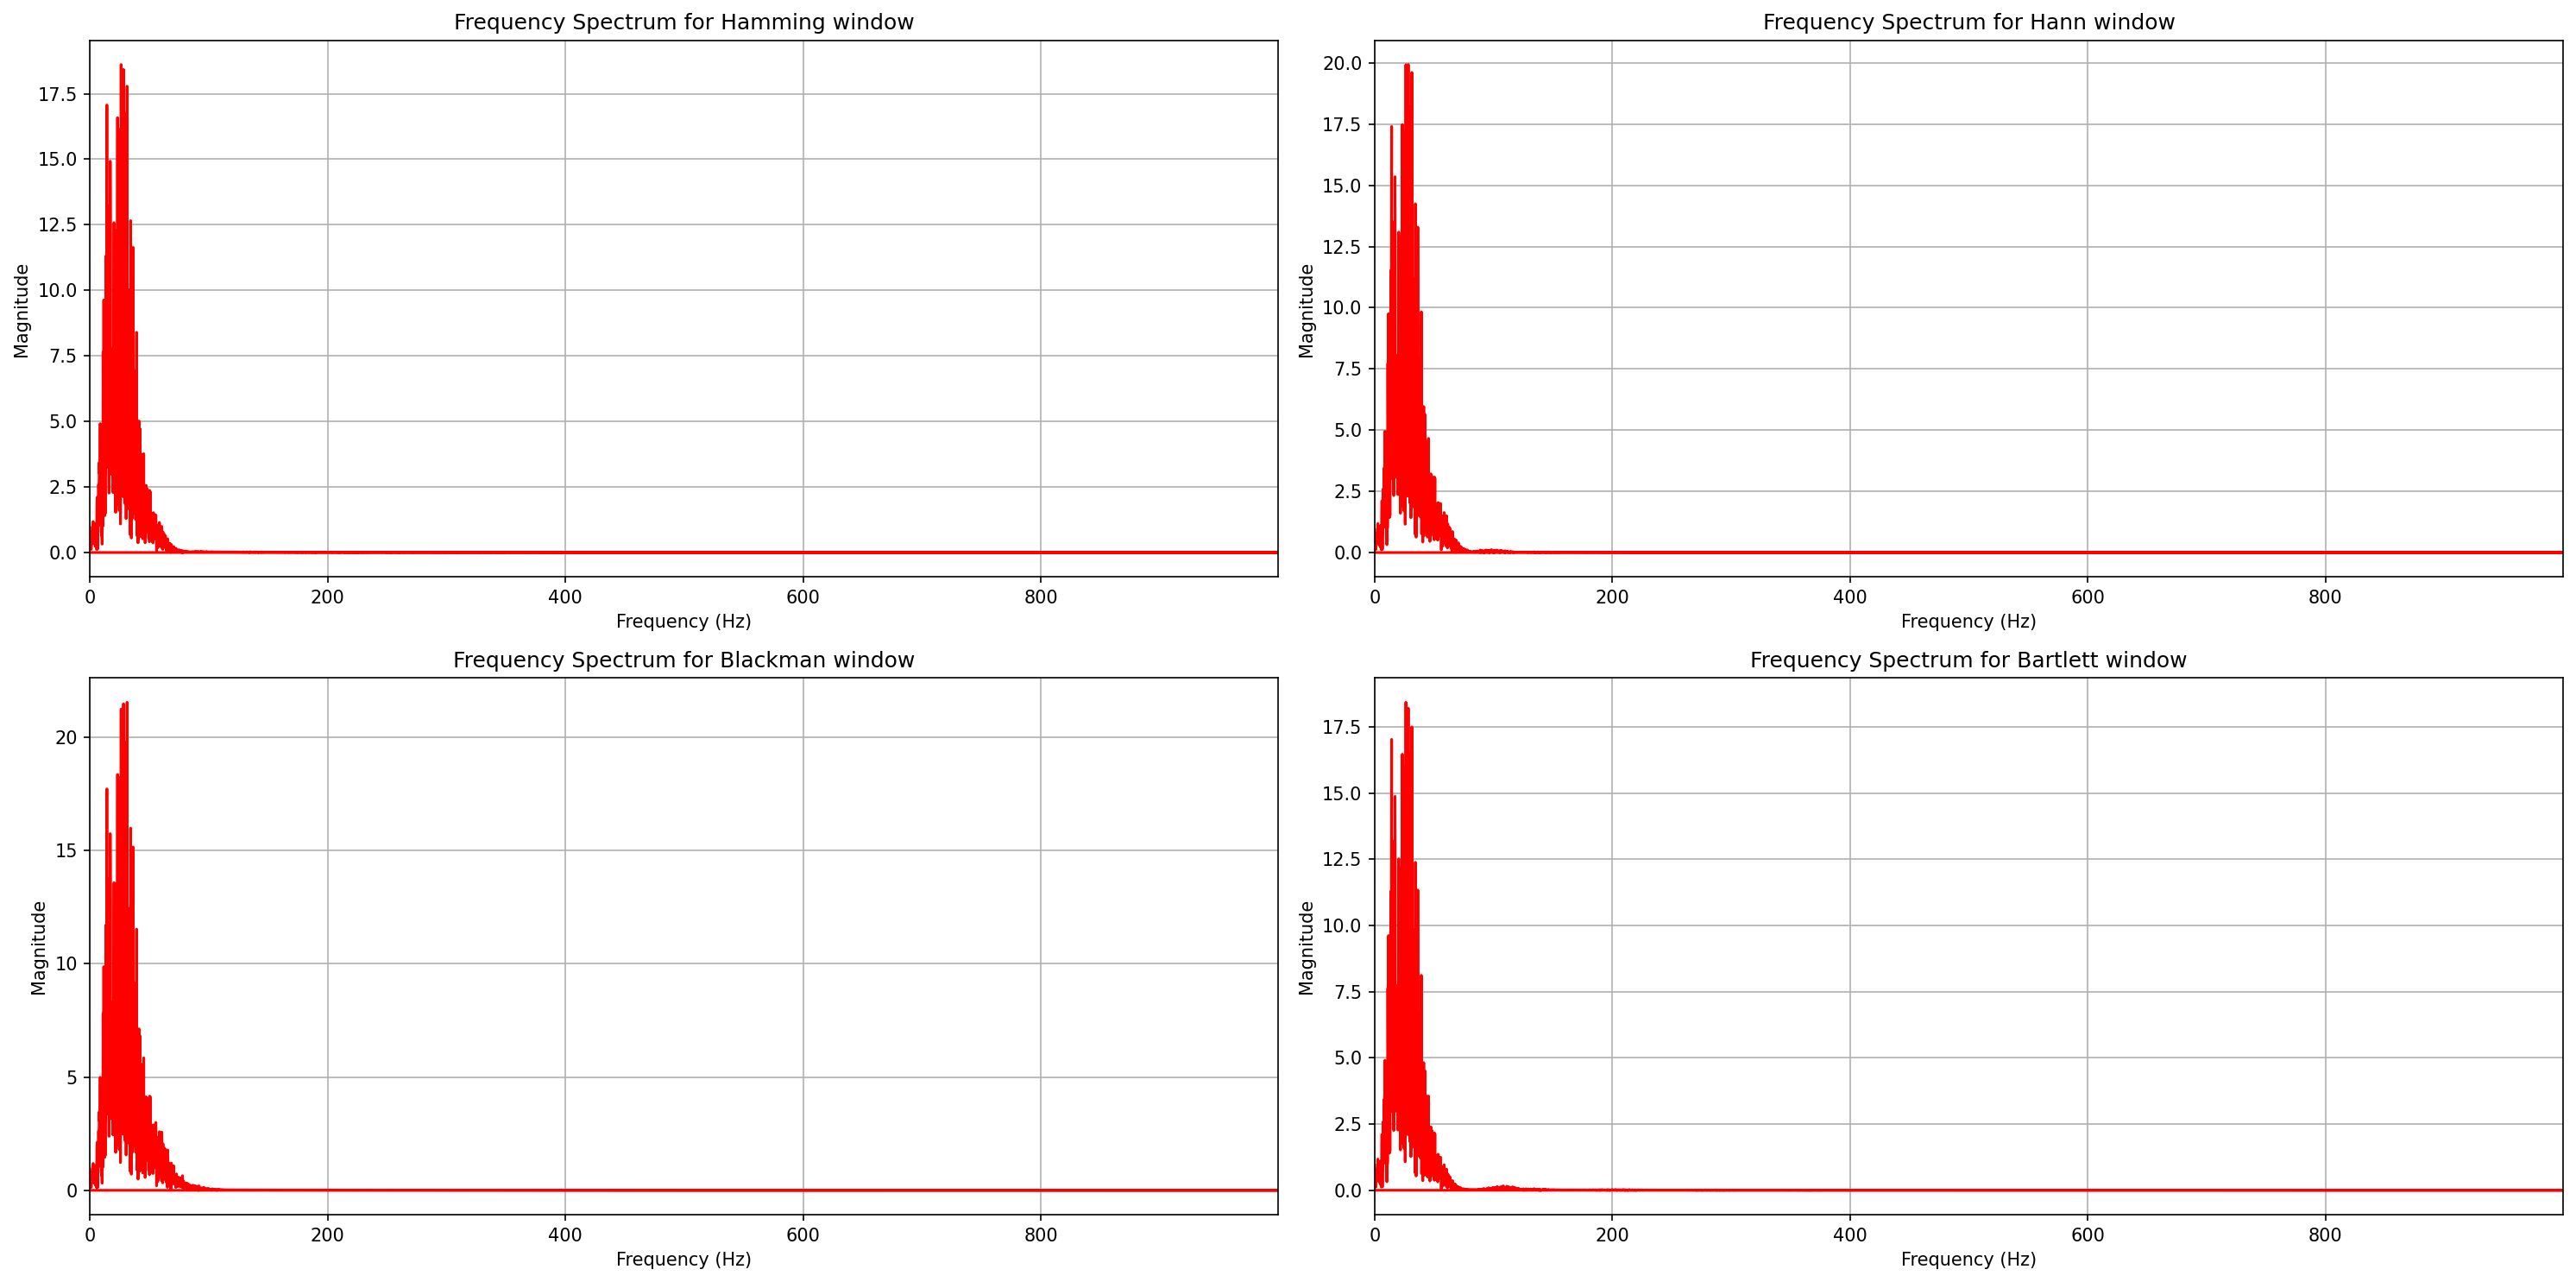

In [21]:
plt.figure(figsize=(20, 10), dpi=150)

for i, win in enumerate(window_options):
    # Apply FIR filter
    y_hat = bandpass_fir_filter(y, lowcut, highcut, sr, win, order)
    
    # Compute the FFT of the filtered signal
    y_hat_fft = np.fft.fft(y_hat)
    
    # Plot the magnitude of the FFT
    plt.subplot(2, 2, i+1)
    plt.plot(freqs, np.abs(y_hat_fft), color='r')
    plt.grid()
    plt.title(f'Frequency Spectrum for {win.capitalize()} window')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, np.max(freqs))

plt.tight_layout()
plt.show()

### Butterworth Bandpass Filtering

Butterworth filters are widely used in signal processing for their maximally flat frequency response in the passband, which means they do not have ripples. The frequency response of an n-th order Butterworth filter is defined as:

$$
|H(j\omega)| = \frac{1}{\sqrt{1 + \left(\frac{\omega}{\omega_c}\right)^{2n}}}
$$

where:
- $ \omega_c $ is the cutoff frequency,
- $ n $ is the order of the filter.

#### Bandpass Butterworth Filter

A Bandpass Butterworth filter allows frequencies within a certain range (between $ \omega_1 $ and $ \omega_2 $) to pass while attenuating frequencies outside this rang$$

#### Frequency Response:
$$
|H_{BP}(j\omega)| = \frac{1}{\sqrt{1 + \left(\frac{\omega^2 - \omega_1\omega_2}{\omega(\omega_2 - \omega_1)}\right)^{2n}}}
$$

### Filter Design Steps

1. **Choose the filter type**: Low-Pass, High-Pass, or Bandpass.
2. **Determine the order** $ n $ based on the desired roll-off.
3. **Calculate the cutoff frequencies** $ \omega_c $ for Low/High-Pass or $ \omega_1 $ and $ \omega_2 $ for Bandpass.
4. **Design the filter** using the corresponding transfer function.


In [22]:
def butterworth_bandpass_filter(signal_data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    normalized_lowcut = lowcut / nyquist
    normalized_highcut = highcut / nyquist

    # IIR filter (Butterworth)
    iir_b, iir_a = signal.butter(
        order, [normalized_lowcut, normalized_highcut], btype='band')
    
    iir_filtered_signal = signal.lfilter(iir_b, iir_a, signal_data)

    return iir_filtered_signal

MSE for order 2: 1.678761947189926e-09
MSE for order 4: 2.231357509530285e-09
MSE for order 6: 2.8829650442106246e-09
MSE for order 8: 8.02076019156563e-09


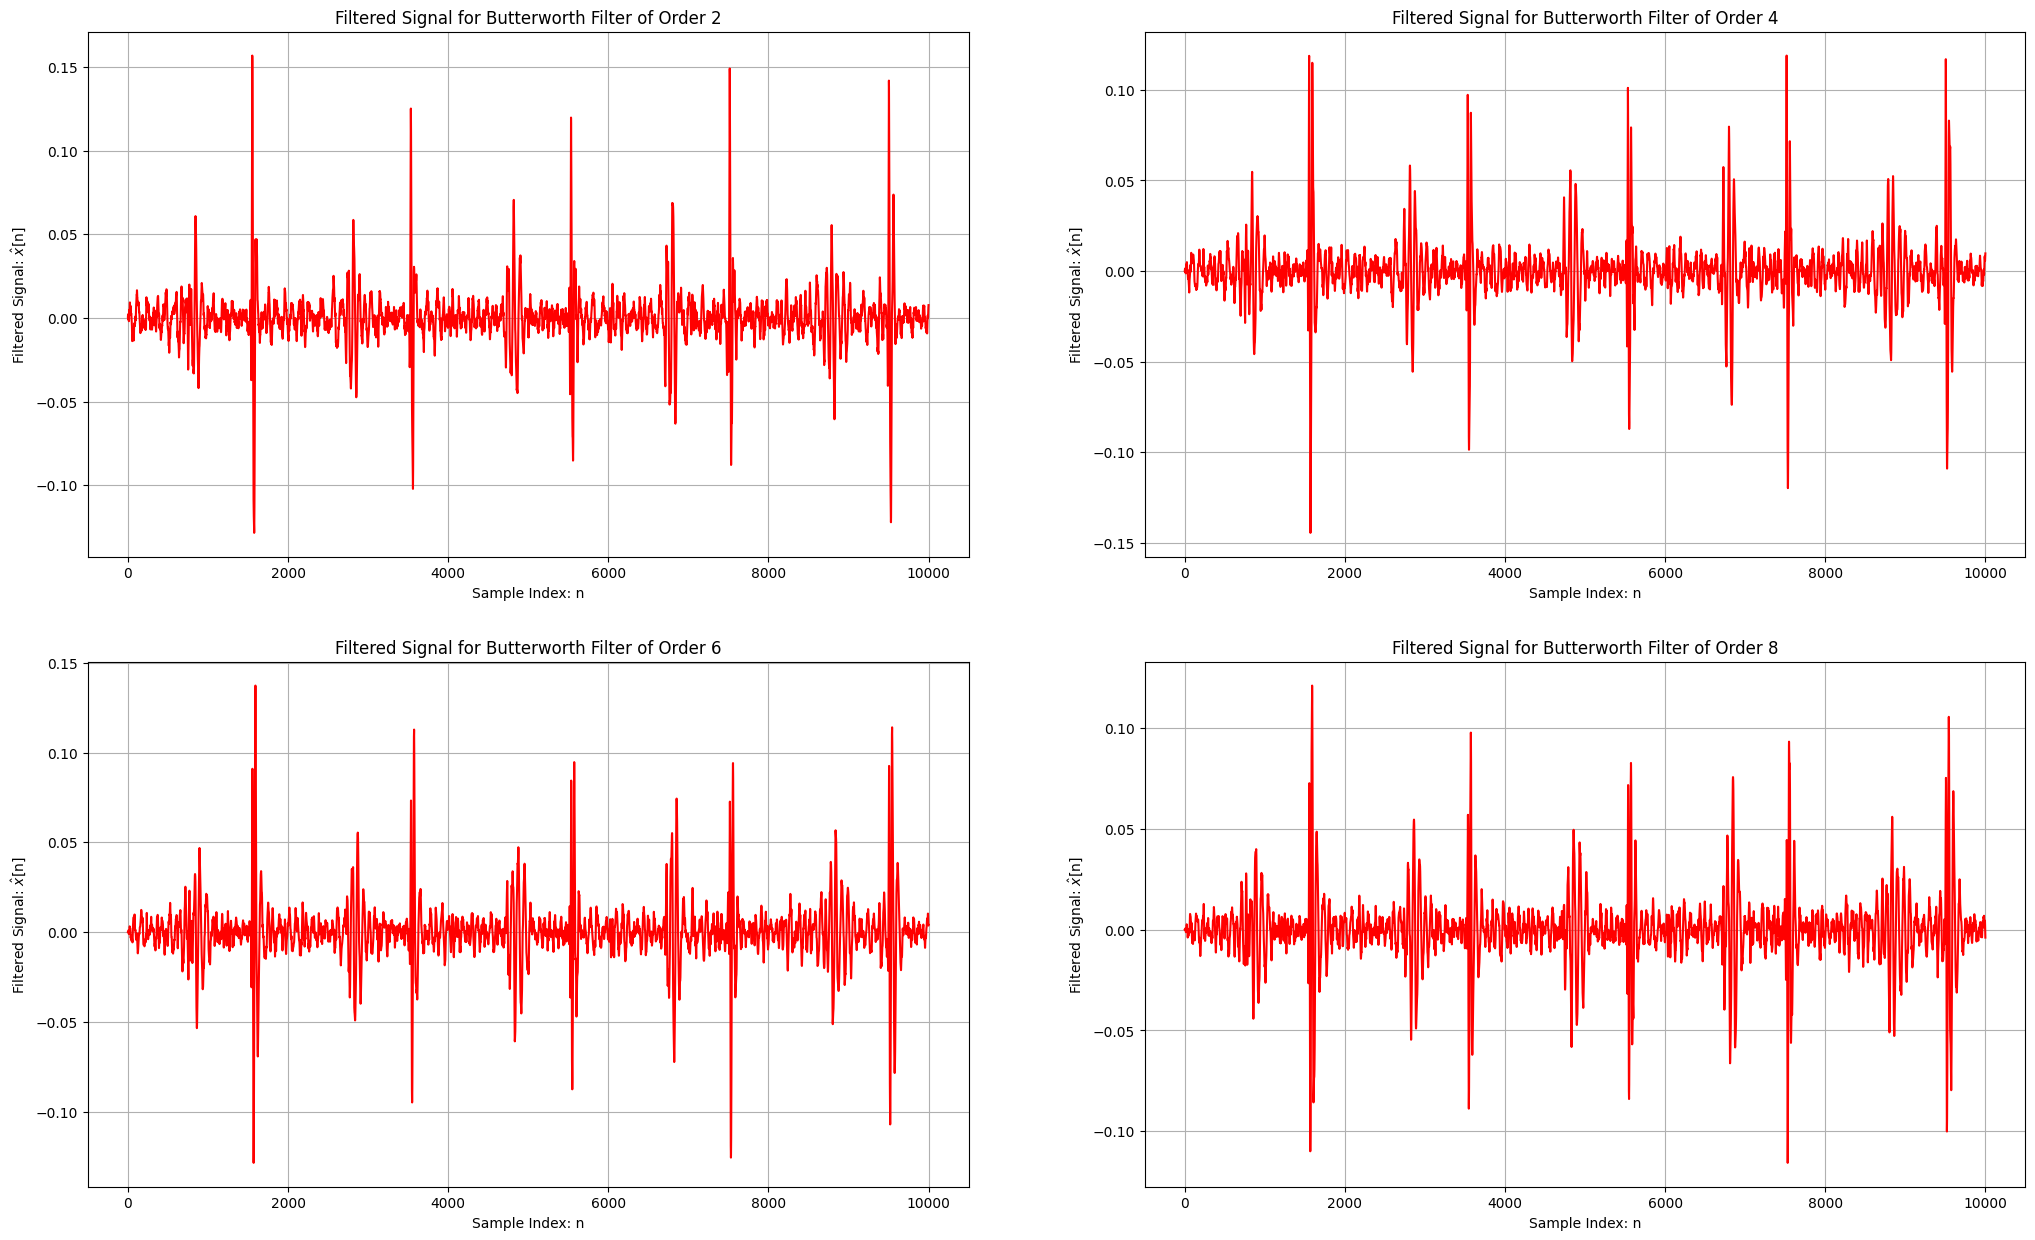

In [23]:
butterworth_orders = [2, 4, 6, 8]

plt.figure(figsize=(25, 15), dpi=100)

for i, order in enumerate(butterworth_orders):
    plt.subplot(2, 2, i+1)
    y_hat = butterworth_bandpass_filter(y, lowcut, highcut, sr, order)
    print(f"MSE for order {order}: {np.mean(y_hat-x_clean)**2}")
    plt.plot(y_hat, color='r')
    plt.xlabel('Sample Index: n')
    plt.ylabel('Filtered Signal: $\hat x$[n]')
    plt.title(f'Filtered Signal for Butterworth Filter of Order {order}')
    plt.grid()

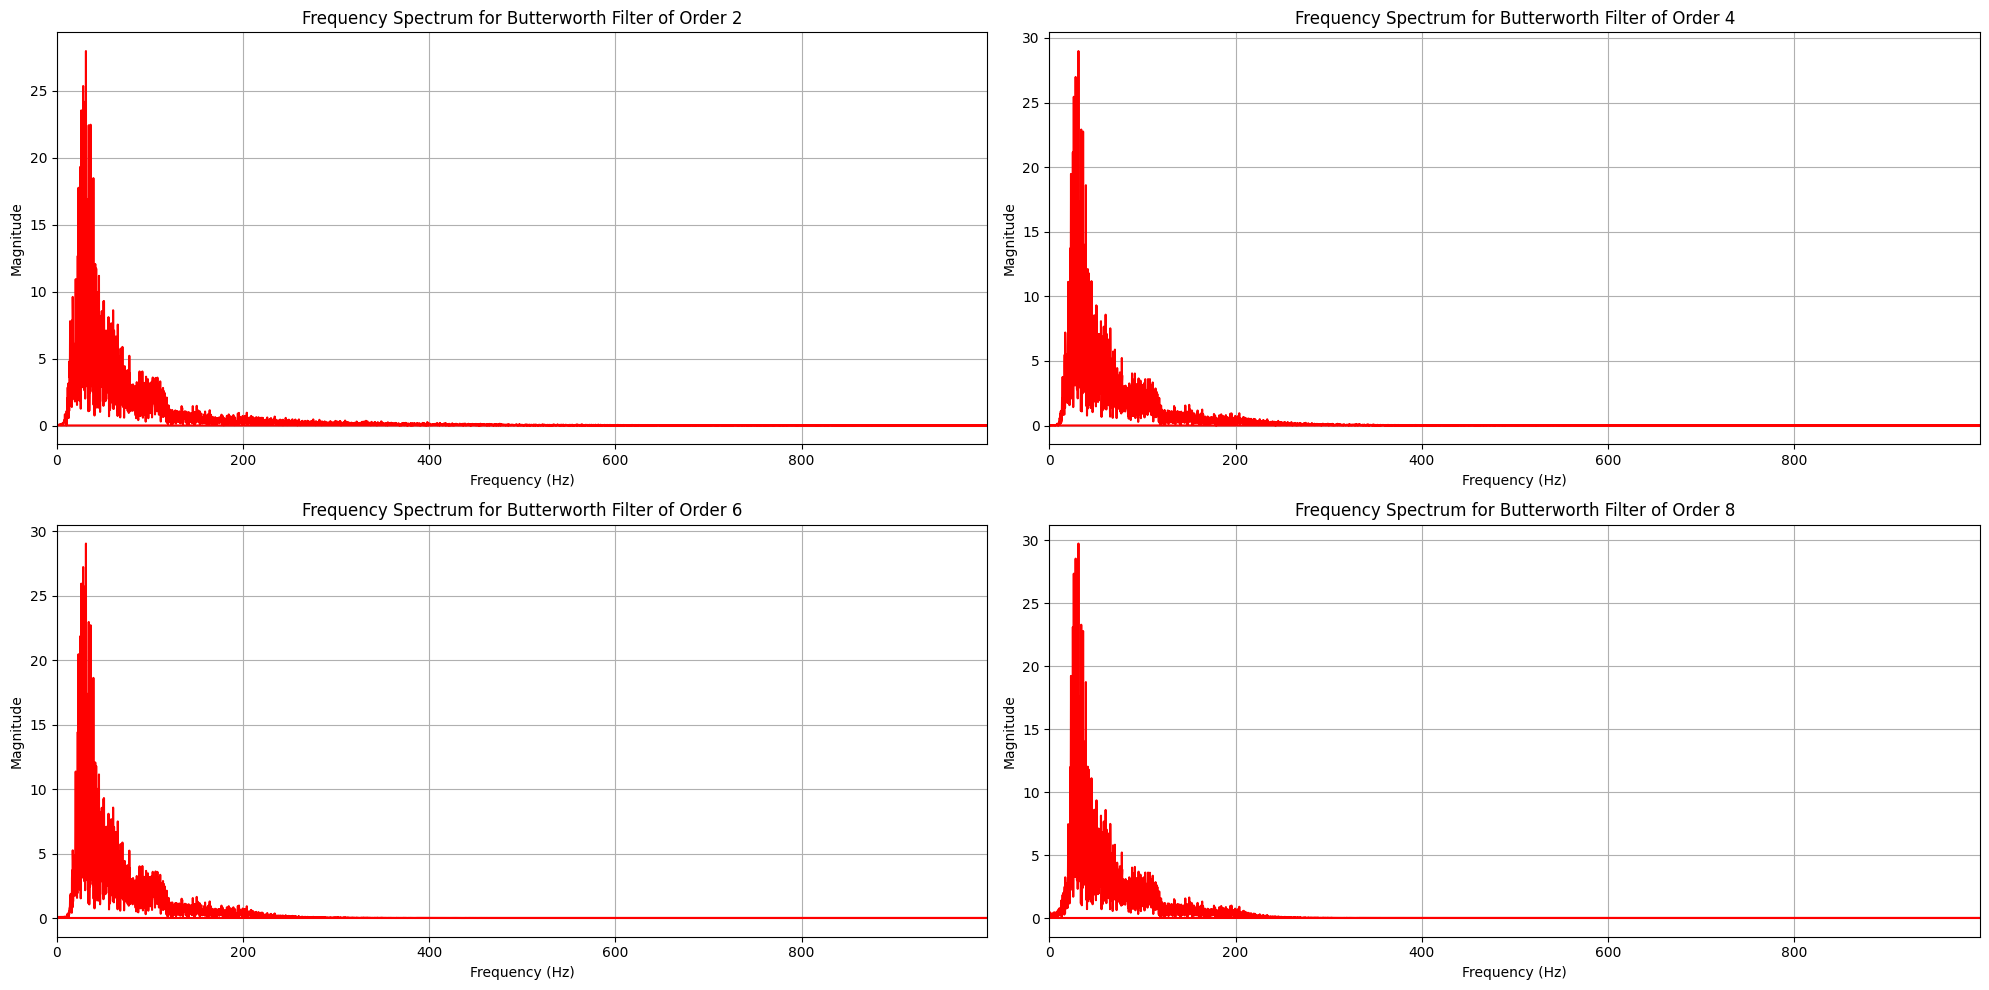

In [24]:
plt.figure(figsize=(20, 10), dpi=100)

for i, order in enumerate(butterworth_orders):
    # Apply Butterworth filter
    y_hat = butterworth_bandpass_filter(y, lowcut, highcut, sr, order)
    
    # Compute the FFT of the filtered signal
    y_hat_fft = np.fft.fft(y_hat)
    
    # Plot the magnitude of the FFT
    plt.subplot(2, 2, i+1)
    plt.plot(freqs, np.abs(y_hat_fft), color='r')
    plt.grid()
    plt.title(f'Frequency Spectrum for Butterworth Filter of Order {order}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, np.max(freqs))

plt.tight_layout()
plt.show()

In [25]:
def calculate_rsnr(original, reconstructed):
    """Calculate Reconstruction Signal-to-Noise Ratio (RSNR) in dB"""
    error = original - reconstructed
    rsnr = 10 * np.log10(np.sum(original**2) / np.sum(error**2))
    return rsnr


def add_noise_with_snr(signal, snr_db):
    """Add noise to signal with specified SNR in dB"""
    signal_power = np.mean(signal**2)
    noise_power = signal_power / (10**(snr_db / 10))
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    return signal + noise, noise


# Load and prepare data
data = loadmat('PCG_Data\heartSoundData.mat')
heart_sound_struct = data['heartSoundData']
pcg_signal = heart_sound_struct['Data'][0][0][:, 0]
fs = 2000

# Initial median filtering
original_signal = medfilt(pcg_signal, kernel_size=5)

# Parameters for different filters
snr_values = [5, 10, 15]
gaussian_sigmas = [4, 6, 8, 10]
median_orders = [11, 21, 31, 41]
butterworth_orders = [4, 6, 8, 10]
window_types = ['hamming', 'hann', 'blackman', 'bartlett']

# Store results
results = {snr: {'gaussian': [], 'median': [], 'fir': [], 'butterworth': []}
           for snr in snr_values}

# Process with different SNR values
for snr_db in snr_values:
    print(f"\nProcessing SNR = {snr_db} dB")
    noisy_signal, noise = add_noise_with_snr(original_signal, snr_db)

    # 1. Gaussian Filter
    print("\nGaussian Filter Results:")
    for sigma in gaussian_sigmas:
        filtered = gaussian_filter1d(noisy_signal, sigma)
        rsnr = calculate_rsnr(original_signal, filtered)
        results[snr_db]['gaussian'].append((sigma, rsnr))
        print(f"Sigma = {sigma}: RSNR = {rsnr:.2f} dB")

    # 2. Median Filter
    print("\nMedian Filter Results:")
    for order in median_orders:
        filtered = medfilt(noisy_signal, order)
        rsnr = calculate_rsnr(original_signal, filtered)
        results[snr_db]['median'].append((order, rsnr))
        print(f"Length = {order}: RSNR = {rsnr:.2f} dB")

    # 3. FIR Bandpass Filter
    print("\nFIR Bandpass Filter Results:")
    for window in window_types:
        b = firwin(51, [20/(fs/2), 500/(fs/2)], pass_zero=False, window=window)
        filtered = lfilter(b, 1.0, noisy_signal)
        rsnr = calculate_rsnr(original_signal, filtered)
        results[snr_db]['fir'].append((window, rsnr))
        print(f"Window = {window}: RSNR = {rsnr:.2f} dB")

    # 4. Butterworth Filter
    print("\nButterworth Filter Results:")
    for order in butterworth_orders:
        b, a = butter(order, [20, 500], btype='band', fs=fs)
        filtered = filtfilt(b, a, noisy_signal)
        rsnr = calculate_rsnr(original_signal, filtered)
        results[snr_db]['butterworth'].append((order, rsnr))
        print(f"Order = {order}: RSNR = {rsnr:.2f} dB")


Processing SNR = 5 dB

Gaussian Filter Results:
Sigma = 4: RSNR = 13.57 dB
Sigma = 6: RSNR = 13.13 dB
Sigma = 8: RSNR = 12.43 dB
Sigma = 10: RSNR = 11.71 dB

Median Filter Results:
Length = 11: RSNR = 13.33 dB
Length = 21: RSNR = 15.29 dB
Length = 31: RSNR = 15.51 dB
Length = 41: RSNR = 14.99 dB

FIR Bandpass Filter Results:
Window = hamming: RSNR = 1.23 dB
Window = hann: RSNR = 1.35 dB
Window = blackman: RSNR = 1.56 dB
Window = bartlett: RSNR = 1.32 dB

Butterworth Filter Results:
Order = 4: RSNR = -0.01 dB
Order = 6: RSNR = -0.06 dB
Order = 8: RSNR = -0.08 dB
Order = 10: RSNR = -0.08 dB

Processing SNR = 10 dB

Gaussian Filter Results:
Sigma = 4: RSNR = 15.78 dB
Sigma = 6: RSNR = 14.45 dB
Sigma = 8: RSNR = 13.25 dB
Sigma = 10: RSNR = 12.26 dB

Median Filter Results:
Length = 11: RSNR = 18.37 dB
Length = 21: RSNR = 19.20 dB
Length = 31: RSNR = 18.24 dB
Length = 41: RSNR = 16.65 dB

FIR Bandpass Filter Results:
Window = hamming: RSNR = 1.78 dB
Window = hann: RSNR = 1.91 dB
Window = bl

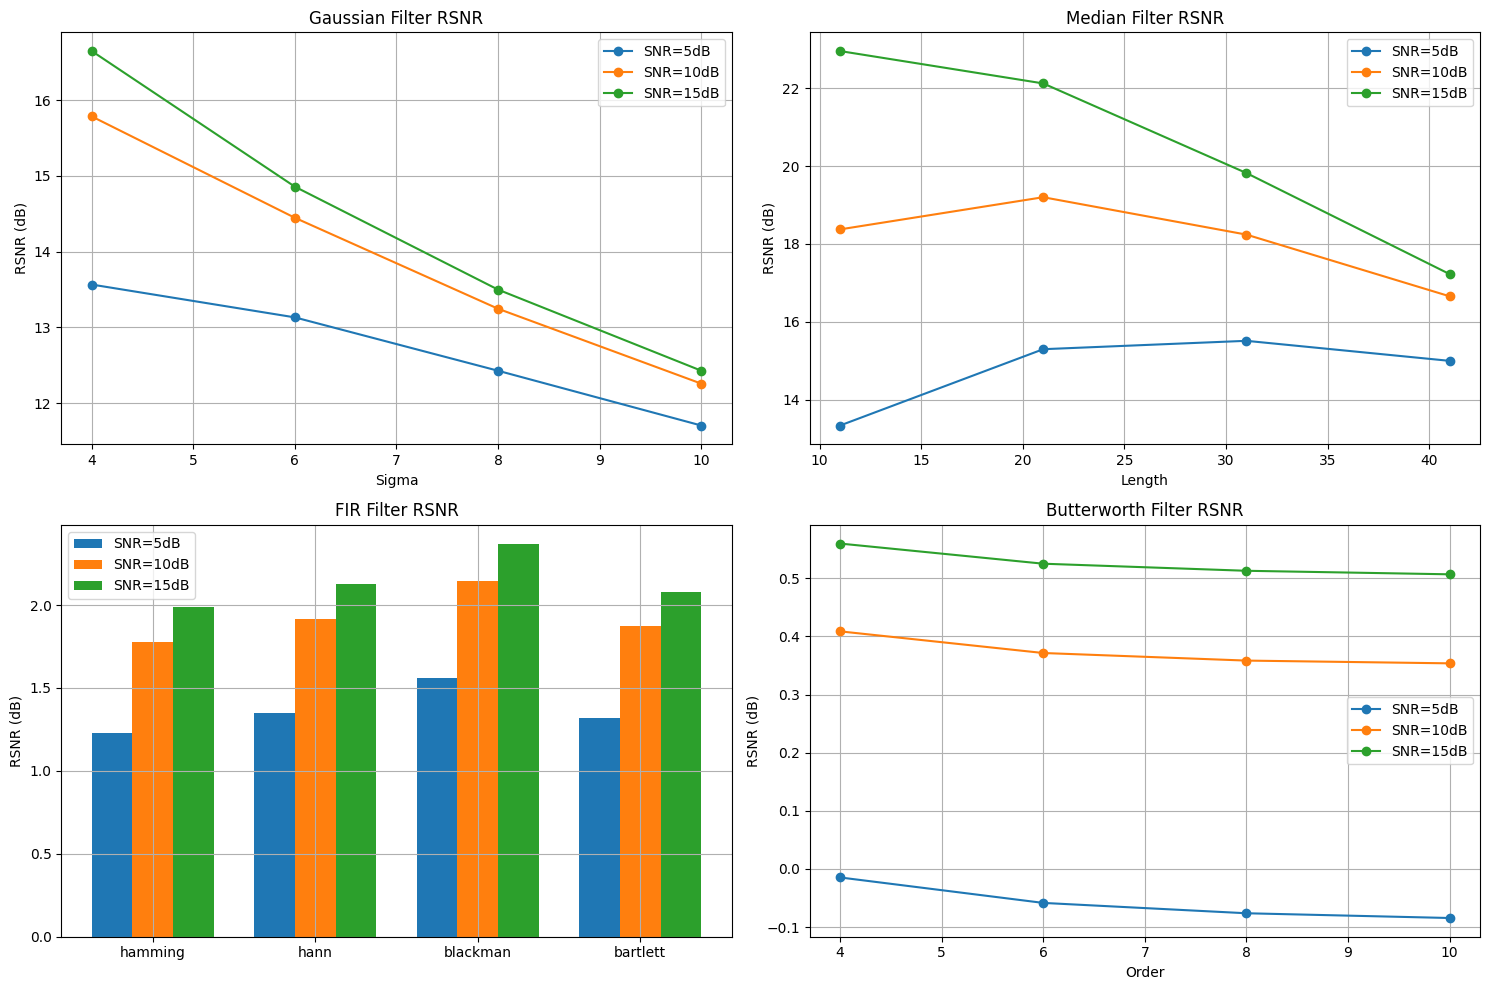

In [26]:
# Plot RSNR comparisons
plt.figure(figsize=(15, 10))

# 1. Gaussian Filter RSNR
plt.subplot(2, 2, 1)
for snr in snr_values:
    sigmas, rsnrs = zip(*results[snr]['gaussian'])
    plt.plot(sigmas, rsnrs, 'o-', label=f'SNR={snr}dB')
plt.title('Gaussian Filter RSNR')
plt.xlabel('Sigma')
plt.ylabel('RSNR (dB)')
plt.grid(True)
plt.legend()

# 2. Median Filter RSNR
plt.subplot(2, 2, 2)
for snr in snr_values:
    orders, rsnrs = zip(*results[snr]['median'])
    plt.plot(orders, rsnrs, 'o-', label=f'SNR={snr}dB')
plt.title('Median Filter RSNR')
plt.xlabel('Length')
plt.ylabel('RSNR (dB)')
plt.grid(True)
plt.legend()

# 3. FIR Filter RSNR
plt.subplot(2, 2, 3)
x = np.arange(len(window_types))
width = 0.25
for i, snr in enumerate(snr_values):
    windows, rsnrs = zip(*results[snr]['fir'])
    plt.bar(x + i*width, rsnrs, width, label=f'SNR={snr}dB')
plt.title('FIR Filter RSNR')
plt.xticks(x + width, window_types)
plt.ylabel('RSNR (dB)')
plt.grid(True)
plt.legend()

# 4. Butterworth Filter RSNR
plt.subplot(2, 2, 4)
for snr in snr_values:
    orders, rsnrs = zip(*results[snr]['butterworth'])
    plt.plot(orders, rsnrs, 'o-', label=f'SNR={snr}dB')
plt.title('Butterworth Filter RSNR')
plt.xlabel('Order')
plt.ylabel('RSNR (dB)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Signal Envelope Formation

The envelope of a signal represents its amplitude variation over time, providing a smooth curve that outlines the extremes of the signal. It is particularly useful in analyzing amplitude-modulated signals, such as heart sounds in phonocardiograms.

### Hilbert Transform

The Hilbert Transform is a mathematical tool used to derive the analytic representation of a real-valued signal. The analytic signal is a complex-valued signal that combines the original signal with its Hilbert Transform, providing a way to compute the instantaneous amplitude (envelope) and phase of the signal.

Given a real-valued signal $ x(t) $, its Hilbert Transform $ \hat{x}(t) $ is defined as:

$$
\hat{x}(t) = \frac{1}{\pi} \text{P.V.} \int_{-\infty}^{\infty} \frac{x(\tau)}{t - \tau} d\tau
$$

where P.V. denotes the Cauchy principal value of the integral.

### Analytic Signal

The analytic signal $ z(t) $ is constructed using the original signal $ x(t) $ and its Hilbert Transform $ \hat{x}(t) $:

$$
z(t) = x(t) + j\hat{x}(t)
$$

where $ j $ is the imaginary unit.

### Envelope Calculation

The envelope $ A(t) $ of the signal is the magnitude of the analytic signal:

$$
A(t) = |z(t)| = \sqrt{x(t)^2 + \hat{x}(t)^2}
$$

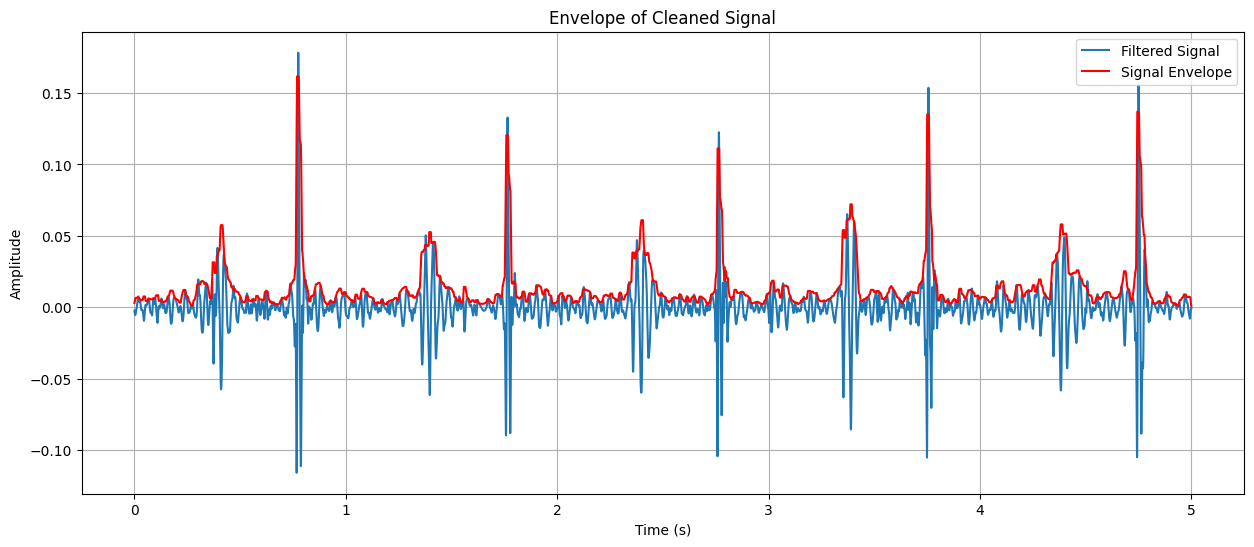

In [5]:
def process_pcg_signal(pcg_signal, fs, threshold=0.25):
    # Normalize the signal
    pcg_signal = pcg_signal / np.max(np.abs(pcg_signal))

    # First apply thresholding to clean the signal
    cleaned_signal = np.where(np.abs(pcg_signal) <= threshold, pcg_signal, 0)

    # Design bandpass filter (20-150 Hz for heart sounds)
    nyquist = fs / 2
    low_cut = 20 / nyquist
    high_cut = 150 / nyquist
    b, a = butter(4, [low_cut, high_cut], btype='band')

    # Apply bandpass filter to cleaned signal
    filtered_signal = filtfilt(b, a, cleaned_signal)

    # Calculate envelope using Hilbert transform
    analytic_signal = signal.hilbert(filtered_signal)
    envelope = np.abs(analytic_signal)

    # Apply median filter to smooth the envelope
    envelope_smooth = signal.medfilt(envelope, kernel_size=31)

    return cleaned_signal, filtered_signal, envelope_smooth


# Load and process the signal
data = loadmat('PCG_Data\\heartSoundData.mat')
heart_sound_struct = data['heartSoundData']
heart_sound_data = heart_sound_struct['Data'][0][0]
pcg_signal = heart_sound_data[:, 0]
fs = 2000

# Create time array
time = np.arange(len(pcg_signal)) / fs

# Process the signal
cleaned_signal, filtered_signal, envelope = process_pcg_signal(
    pcg_signal, fs, threshold=0.25)

# Plotting
plt.figure(figsize=(15, 6))

# Filtered signal
plt.plot(time, filtered_signal, label='Filtered Signal')

# Envelope
plt.plot(time, envelope, label = 'Signal Envelope', color='r')
plt.title('Envelope of Cleaned Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Systole and Diastole Detection

Systole and diastole are key phases of the cardiac cycle. Accurate detection in a phonocardiogram (PCG) signal is crucial for heart function analysis and diagnosis.

### Systole
Systole is the contraction phase, pumping blood out of the heart, marked by the first heart sound (S1) due to mitral and tricuspid valve closure.

### Diastole
Diastole is the relaxation phase, filling the heart with blood, marked by the second heart sound (S2) due to aortic and pulmonary valve closure.

### Detection Method
1. **Envelope Extraction**: Compute the PCG signal envelope using the Hilbert transform.
2. **Peak Detection**: Identify S1 and S2 peaks using amplitude thresholds and minimum distance criteria.
3. **Interval Analysis**: Analyze intervals between peaks for accurate classification.

This detection enables heart rate calculation, heart rate variability (HRV) assessment, and identification of potential cardiac abnormalities.


In [6]:
def detect_s1_s2(envelope, fs):
    # Detect S1 peaks (amplitude > 0.10)
    s1_peaks, _ = signal.find_peaks(envelope, height=0.10, distance=int(0.2*fs))

    # Detect S2 peaks (amplitude > 0.04)
    s2_peaks, _ = signal.find_peaks(envelope, height=0.04, distance=int(0.2*fs))

    # Remove S1 peaks from S2 peaks to avoid duplicates
    s2_peaks = np.setdiff1d(s2_peaks, s1_peaks)

    # Calculate intervals and ratios
    all_peaks = np.sort(np.concatenate([s1_peaks, s2_peaks]))
    intervals = np.diff(all_peaks) / fs  # Convert to seconds

    return s1_peaks, s2_peaks, intervals

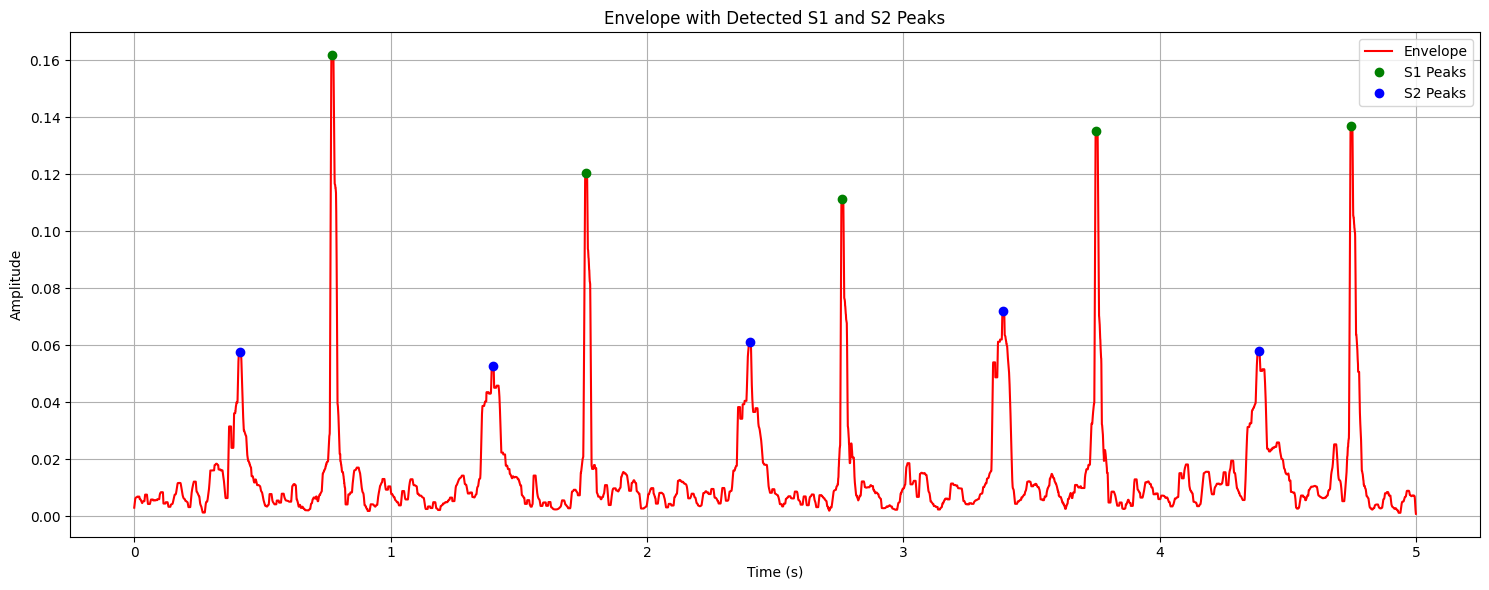


Interval Analysis:
Number of S1 peaks detected: 5
Number of S2 peaks detected: 5

Intervals between consecutive peaks (seconds):
Interval 1: 0.360s
Interval 2: 0.625s
Interval 3: 0.364s
Interval 4: 0.638s
Interval 5: 0.361s
Interval 6: 0.627s
Interval 7: 0.364s
Interval 8: 0.632s
Interval 9: 0.362s

Ratios between consecutive intervals:
Ratio 1: 0.58
Ratio 2: 1.72
Ratio 3: 0.57
Ratio 4: 1.77
Ratio 5: 0.58
Ratio 6: 1.72
Ratio 7: 0.58
Ratio 8: 1.75

Ratio Analysis:
Ratios close to 2:1: 4
Ratios close to 1:2: 4
Total ratios: 8


In [7]:
# Find S1 and S2 peaks
s1_peaks, s2_peaks, intervals = detect_s1_s2(envelope, fs)

# Calculate ratios between consecutive intervals
ratios = intervals[:-1] / intervals[1:]

plt.figure(figsize=(15, 6))

plt.plot(time, envelope, 'r', label='Envelope')
plt.plot(time[s1_peaks], envelope[s1_peaks], 'go', label='S1 Peaks')
plt.plot(time[s2_peaks], envelope[s2_peaks], 'bo', label='S2 Peaks')
plt.title('Envelope with Detected S1 and S2 Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print interval analysis
print("\nInterval Analysis:")
print(f"Number of S1 peaks detected: {len(s1_peaks)}")
print(f"Number of S2 peaks detected: {len(s2_peaks)}")
print("\nIntervals between consecutive peaks (seconds):")
for i, interval in enumerate(intervals):
    print(f"Interval {i+1}: {interval:.3f}s")

print("\nRatios between consecutive intervals:")
for i, ratio in enumerate(ratios):
    print(f"Ratio {i+1}: {ratio:.2f}")

# Analyze if ratios match expected 2:1 or 1:2 pattern
close_to_2 = np.sum((ratios > 1.7) & (ratios < 2.2))
close_to_half = np.sum((ratios > 0.4) & (ratios < 0.6))

print("\nRatio Analysis:")
print(f"Ratios close to 2:1: {close_to_2}")
print(f"Ratios close to 1:2: {close_to_half}")
print(f"Total ratios: {len(ratios)}")


# Heart Rate and HRV Metrics

In this analysis, we have detected several key metrics from the PCG signal, which are crucial for understanding heart function and variability:

| **Metric**                      | **Calculation Technique**                                                                 | **Utility**                                                                                  |
|---------------------------------|-------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| **Mean Heart Rate (Mean_HR)**   | Calculated from the average of RR intervals.                                               | Indicates the average number of heartbeats per minute.                                       |
| **Minimum Heart Rate (Min_HR)** | Derived from the instantaneous heart rates.                                                | Shows the lowest heart rate observed.                                                        |
| **Maximum Heart Rate (Max_HR)** | Derived from the instantaneous heart rates.                                                | Shows the highest heart rate observed.                                                       |
| **Heart Rate Standard Deviation (HR_StdDev)** | Standard deviation of the instantaneous heart rates.                          | Indicates variability in heart rate.                                                         |
| **SDNN (Standard Deviation of NN intervals)** | Standard deviation of the RR intervals.                                      | Measures overall heart rate variability.                                                     |
| **RMSSD (Root Mean Square of Successive Differences)** | Root mean square of differences between successive RR intervals. | Reflects short-term heart rate variability.                                                  |
| **Rolling Average Heart Rate**  | Average heart rate calculated over a moving window (e.g., 10 seconds).                     | Provides a smoothed heart rate trend over time.                                              |
| **Instantaneous Heart Rate**    | Calculated from each RR interval.                                                          | Provides a beat-to-beat heart rate measure.                                                  |
| **RR Interval Variation**       | Variation in time between consecutive heartbeats.                                          | Indicates the consistency of the heart rhythm.                                               |

These metrics are calculated using the detected $S_1$ peaks from the PCG signal, providing insights into the heart's performance and variability.

In [31]:
def calculate_heart_rate_metrics(s1_peaks, fs, window_size=10):
    # Calculate intervals between consecutive S1 peaks (RR intervals)
    rr_intervals = np.diff(s1_peaks) / fs  # in seconds

    # Calculate instantaneous heart rates
    inst_hr = 60 / rr_intervals  # in beats per minute

    # Calculate average heart rate
    avg_hr = np.mean(inst_hr)

    # Calculate heart rate variability metrics
    hrv_metrics = {
        'SDNN': np.std(rr_intervals),  # Standard deviation of RR intervals
        # Root mean square of successive differences
        'RMSSD': np.sqrt(np.mean(np.diff(rr_intervals) ** 2)),
        'Mean_HR': avg_hr,
        'Min_HR': np.min(inst_hr),
        'Max_HR': np.max(inst_hr),
        'HR_StdDev': np.std(inst_hr)
    }

    # Calculate rolling heart rate for visualization
    rolling_hr = []
    times = []
    # Convert window size from seconds to samples
    window = int(window_size * fs)

    for i in range(0, len(s1_peaks) - 1):
        if i < len(s1_peaks) - window:
            window_intervals = np.diff(s1_peaks[i:i + window]) / fs
            hr = 60 / np.mean(window_intervals)
            rolling_hr.append(hr)
            times.append(s1_peaks[i] / fs)
            
    return hrv_metrics, inst_hr, rolling_hr, times

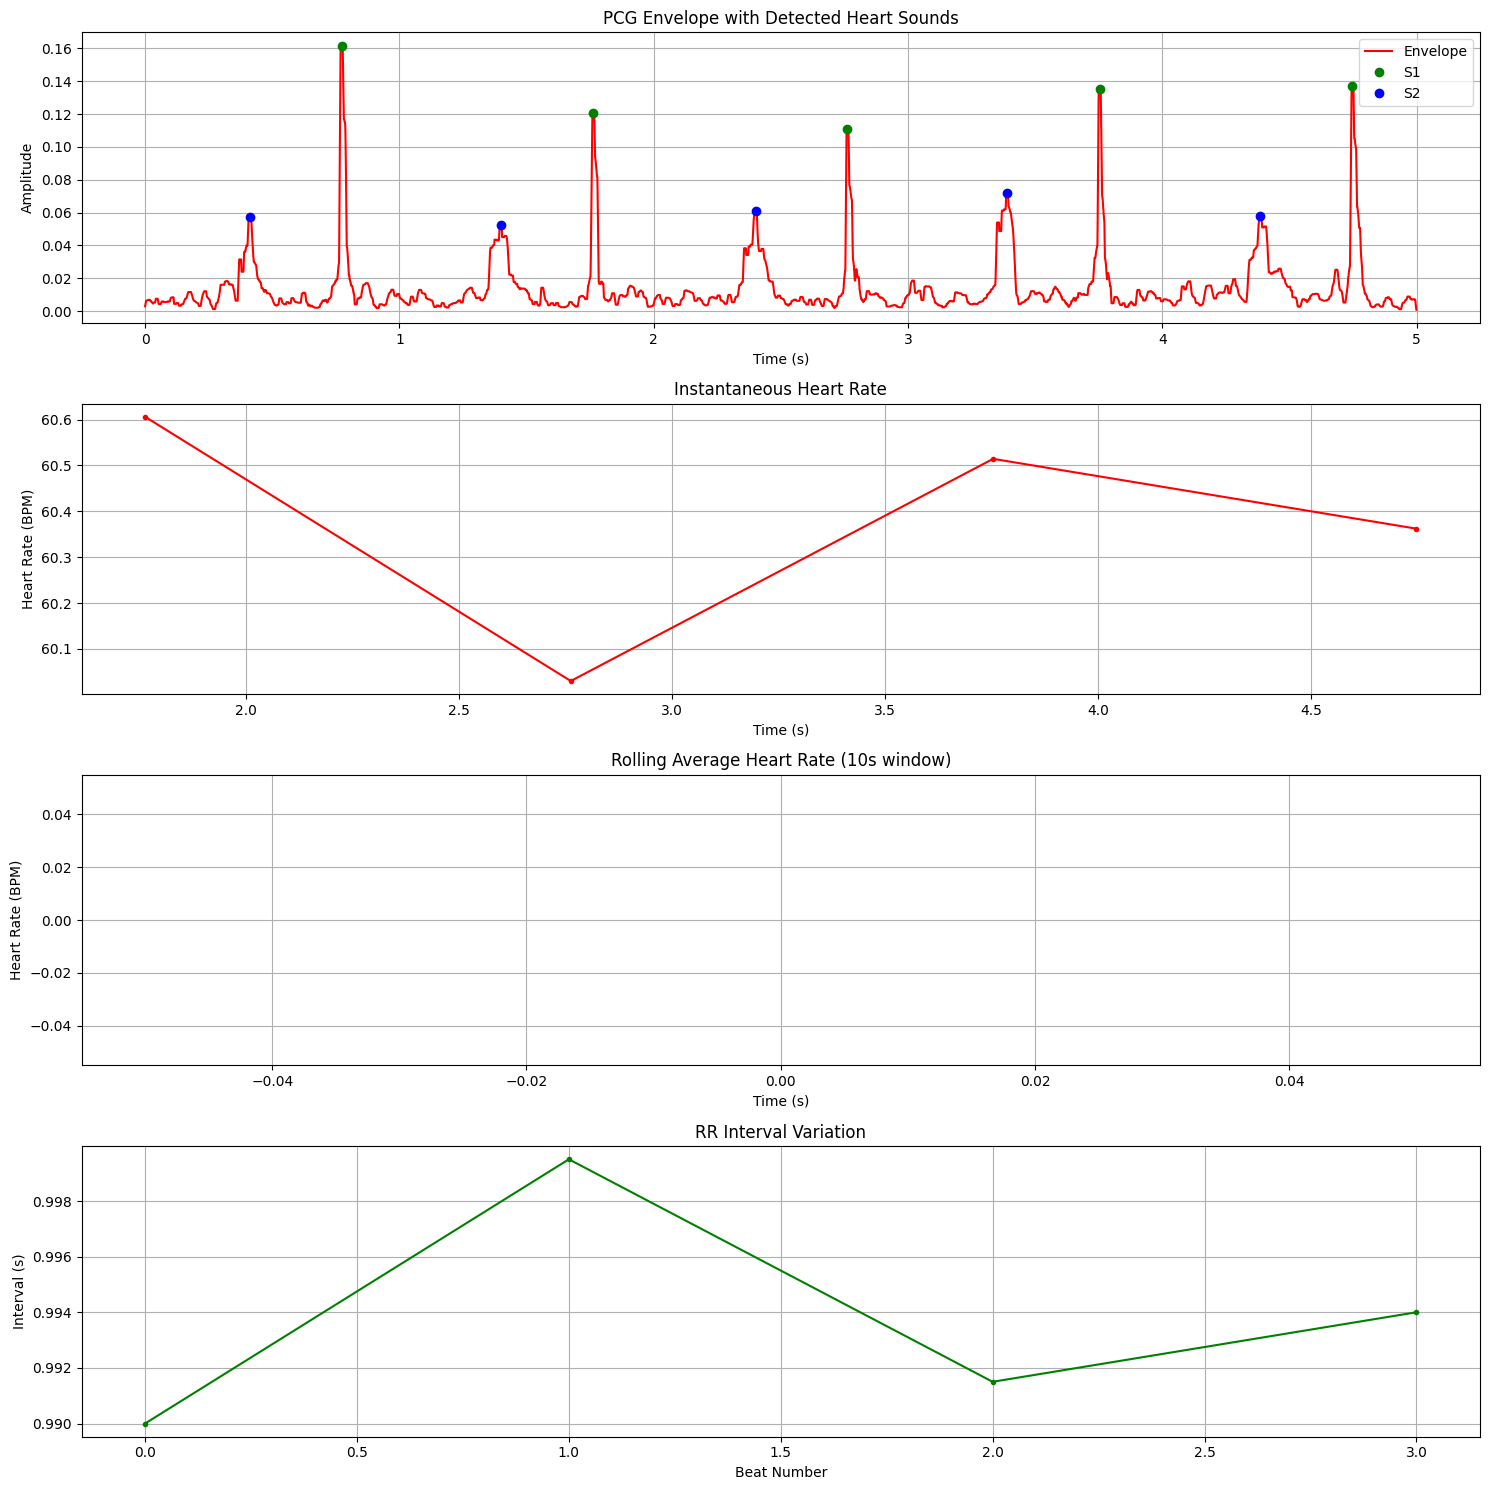


Heart Rate and HRV Analysis:
Mean Heart Rate: 60.4 BPM
Minimum Heart Rate: 60.0 BPM
Maximum Heart Rate: 60.6 BPM
Heart Rate Standard Deviation: 0.2 BPM

Heart Rate Variability Metrics:
SDNN (Standard Deviation of RR intervals): 3.6 ms
RMSSD (Root Mean Square of Successive Differences): 7.3 ms

Heart Rate 95% Confidence Interval: 60.4 ± 0.2 BPM


In [32]:
# Calculate heart rate metrics
hrv_metrics, inst_hr, rolling_hr, hr_times = calculate_heart_rate_metrics(
    s1_peaks, fs)

# Plot the results
plt.figure(figsize=(15, 15))

# Original signal with envelope and peaks
plt.subplot(4, 1, 1)
plt.plot(time, envelope, 'r', label='Envelope')
plt.plot(time[s1_peaks], envelope[s1_peaks], 'go', label='S1')
plt.plot(time[s2_peaks], envelope[s2_peaks], 'bo', label='S2')
plt.title('PCG Envelope with Detected Heart Sounds')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Instantaneous Heart Rate
plt.subplot(4, 1, 2)
plt.plot(time[s1_peaks[1:]], inst_hr, 'r.-')
plt.title('Instantaneous Heart Rate')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.grid(True)

# Rolling Average Heart Rate
plt.subplot(4, 1, 3)
plt.plot(hr_times, rolling_hr, 'b-')
plt.title('Rolling Average Heart Rate (10s window)')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.grid(True)

# RR Interval Variation
plt.subplot(4, 1, 4)
plt.plot(np.diff(s1_peaks) / fs, 'g.-')
plt.title('RR Interval Variation')
plt.xlabel('Beat Number')
plt.ylabel('Interval (s)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print heart rate and HRV metrics
print("\nHeart Rate and HRV Analysis:")
print(f"Mean Heart Rate: {hrv_metrics['Mean_HR']:.1f} BPM")
print(f"Minimum Heart Rate: {hrv_metrics['Min_HR']:.1f} BPM")
print(f"Maximum Heart Rate: {hrv_metrics['Max_HR']:.1f} BPM")
print(f"Heart Rate Standard Deviation: {hrv_metrics['HR_StdDev']:.1f} BPM")
print("\nHeart Rate Variability Metrics:")
print(
    f"SDNN (Standard Deviation of RR intervals): {hrv_metrics['SDNN']*1000:.1f} ms")
print(
    f"RMSSD (Root Mean Square of Successive Differences): {hrv_metrics['RMSSD']*1000:.1f} ms")

# Calculate confidence intervals
ci_hr = sem(inst_hr) * 1.96  # 95% confidence interval
print(f"\nHeart Rate 95% Confidence Interval: {hrv_metrics['Mean_HR']:.1f} ± {ci_hr:.1f} BPM")